###  Reduce the risk of loss by acquiring the right Customer

- Case study to find the best strategy to mitigate credit risk by ‘acquire the right customers’ and reduce the risk of loss.

  - In this project, task is to help CredX identify the right customers using predictive models. Using past data of the bank’s applicants, we need to determine the factors affecting credit risk, create strategies to mitigate the acquisition risk and assess the financial benefit of your project.

- There are two Types of Data-sets provided:
  - I. Demographic data-set
  - II. Credit Bureau data-set
- Requirement: Create two different models:
  - i. Classification model using demographic data
  - ii. Classification model using master data(demographic + Credit Bureau data-set)
  - iii. Create a score card for the applicants

In [1]:
# Importing recquired Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
# set the maximum rows,columns,width
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [4]:
# importing data-sets to dataframe
dem=pd.read_csv(r'C:\Users\91916\Downloads\Demographic data.csv') #Demographic data
cb=pd.read_csv(r'C:\Users\91916\Downloads\Credit Bureau data.csv') #Credit Bureau data
#dem=pd.read_csv(r'C:\Users\hp\Downloads\Demographic data.csv') #Demographic data
#cb=pd.read_csv(r'C:\Users\hp\Downloads\Credit Bureau data.csv') #Credit Bureau data

### Sanity test and data understanding of Demographic data-set

In [5]:
# demographic dataframe dimensions
dem.shape

(71295, 12)

In [6]:
# inspect head of dataframe
dem.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [7]:
#inspect columns of dataframe
dem.columns

Index(['Application ID', 'Age', 'Gender', 'Marital Status (at the time of application)', 'No of dependents', 'Income', 'Education', 'Profession ', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Performance Tag'], dtype='object')

In [8]:
dem.columns.tolist()

['Application ID',
 'Age',
 'Gender',
 'Marital Status (at the time of application)',
 'No of dependents',
 'Income',
 'Education',
 'Profession ',
 'Type of residence',
 'No of months in current residence',
 'No of months in current company',
 'Performance Tag']

In [9]:
# Check the info of the dataframe to check the type of data and null objects
dem.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [10]:
# Describe the dataframe for numerical columns
dem.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


###### From above describe df, it is seen that income and Age have negative values and practically its not possible, so it is required to impute them or remove them, will treat it

In [11]:
# Check the unique values in the dataframe
dem.nunique()

Application ID                                 71292
Age                                               53
Gender                                             2
Marital Status (at the time of application)        2
No of dependents                                   5
Income                                            63
Education                                          5
Profession                                         3
Type of residence                                  5
No of months in current residence                121
No of months in current company                   83
Performance Tag                                    2
dtype: int64

In [12]:
dem.shape

(71295, 12)

###### As number of rows and application unique values has some difference, it is possible it has duplicate values, Lets check it

In [13]:
(dem['Application ID'].value_counts()>1).value_counts()
# There are three duplicate columns in the Dataset, let's remove these three redundent rows.

False    71289
True         3
Name: Application ID, dtype: int64

In [14]:
# lets display the dupliacate rows first
dup_app_value = dem["Application ID"]
dup_dem_app = dem[dup_app_value.isin(dup_app_value[dup_app_value.duplicated()])]
dup_dem_app

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
5243,653287861,26,M,Married,3.0,25.0,Bachelor,SAL,Rented,112,58,0.0
24386,765011468,57,M,Single,4.0,4.5,Bachelor,SAL,Company provided,6,56,0.0
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
48602,671989187,27,M,Married,2.0,35.0,Professional,SAL,Living with Parents,108,7,0.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0


###### Here, we can see there are three duplicate values, now lets drop them

In [15]:
# drop duplicate Application ID values
dem=dem.drop_duplicates('Application ID')

In [16]:
# inspect the columns again
dem.shape 

(71292, 12)

In [17]:
# datatypes looks OK with few null values are there in DF 
dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71292 non-null int64
Age                                            71292 non-null int64
Gender                                         71290 non-null object
Marital Status (at the time of application)    71286 non-null object
No of dependents                               71289 non-null float64
Income                                         71292 non-null float64
Education                                      71173 non-null object
Profession                                     71278 non-null object
Type of residence                              71284 non-null object
No of months in current residence              71292 non-null int64
No of months in current company                71292 non-null int64
Performance Tag                                69867 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 7.1+ MB


In [18]:
dem.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129200e+04,71292.000000,71289.000000,71292.000000,71292.000000,71292.000000,69867.000000
mean,4.989518e+08,44.943037,2.865126,27.195758,34.563570,33.957976,0.042180
std,2.885936e+08,9.939266,1.382312,15.514524,36.760345,20.410377,0.201001
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483706e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975655e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495782e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


In [19]:
# Inpsect null values column values in dataframe
dem.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [20]:
# Inspet the %Age of null values in the dataset column wise
(round(100*(dem.isnull().sum()/len(dem.index)), 2))

Application ID                                 0.00
Age                                            0.00
Gender                                         0.00
Marital Status (at the time of application)    0.01
No of dependents                               0.00
Income                                         0.00
Education                                      0.17
Profession                                     0.02
Type of residence                              0.01
No of months in current residence              0.00
No of months in current company                0.00
Performance Tag                                2.00
dtype: float64

###### There is 2% and less than that null values present in the columns

In [21]:
# lets check the value counts of each column in the data-set
for i in dem.columns:
    print(dem[i].value_counts())

426119166    1
329194358    1
407526217    1
675138412    1
641588078    1
628923610    1
1909617      1
217779626    1
788206455    1
963296130    1
582968185    1
587953019    1
595936125    1
217275262    1
637752191    1
55225216     1
739351398    1
790594405    1
540128099    1
862174050    1
436839265    1
348892000    1
328223580    1
782653484    1
6926430      1
804154200    1
803398876    1
608567819    1
441375439    1
712784722    1
950936401    1
226264967    1
271768398    1
441230209    1
877744224    1
554093388    1
882205625    1
413865686    1
562938797    1
301147057    1
720450483    1
591860663    1
16608184     1
58031034     1
896592776    1
355787841    1
87997058     1
481201092    1
486706408    1
62188488     1
443474889    1
666629035    1
607120296    1
750752679    1
675463935    1
480609189    1
752703562    1
192396194    1
298971578    1
554595227    1
940604314    1
305292781    1
835861394    1
234019726    1
741057203    1
954649484    1
899740555 

#### There null values and outliers in the demographic data-set and it required imputation and removal and we will do it later

## Sanity test and data undestanding of Credit Bureau dataframe

In [22]:
# inspect the dataframe of credit bureau Dataframe
cb.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [23]:
# inspect the shape of dataframe
cb.shape

(71295, 19)

In [24]:
# inspect the columns 
cb.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months', 'No of times 60 DPD or worse in last 6 months', 'No of times 30 DPD or worse in last 6 months', 'No of times 90 DPD or worse in last 12 months', 'No of times 60 DPD or worse in last 12 months', 'No of times 30 DPD or worse in last 12 months', 'Avgas CC Utilization in last 12 months', 'No of trades opened in last 6 months', 'No of trades opened in last 12 months', 'No of PL trades opened in last 6 months', 'No of PL trades opened in last 12 months', 'No of Inquiries in last 6 months (excluding home & auto loans)', 'No of Inquiries in last 12 months (excluding home & auto loans)', 'Presence of open home loan', 'Outstanding Balance', 'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'], dtype='object')

In [25]:
cb.columns.tolist()

['Application ID',
 'No of times 90 DPD or worse in last 6 months',
 'No of times 60 DPD or worse in last 6 months',
 'No of times 30 DPD or worse in last 6 months',
 'No of times 90 DPD or worse in last 12 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of times 30 DPD or worse in last 12 months',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 6 months',
 'No of trades opened in last 12 months',
 'No of PL trades opened in last 6 months',
 'No of PL trades opened in last 12 months',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Presence of open home loan',
 'Outstanding Balance',
 'Total No of Trades',
 'Presence of open auto loan',
 'Performance Tag']

In [26]:
# check the info for null values and data types
cb.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

###### Here, we can see that there are null values present in the dataframe and it required treatment and datatypes looks fine

In [27]:
# describe the dataframe to check the numerical values of dataframe
cb.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


In [28]:
# check the unique values in the dataframe in columns
cb.nunique()

Application ID                                                     71292
No of times 90 DPD or worse in last 6 months                           4
No of times 60 DPD or worse in last 6 months                           6
No of times 30 DPD or worse in last 6 months                           8
No of times 90 DPD or worse in last 12 months                          6
No of times 60 DPD or worse in last 12 months                          8
No of times 30 DPD or worse in last 12 months                         10
Avgas CC Utilization in last 12 months                               114
No of trades opened in last 6 months                                  13
No of trades opened in last 12 months                                 29
No of PL trades opened in last 6 months                                7
No of PL trades opened in last 12 months                              13
No of Inquiries in last 6 months (excluding home & auto loans)        11
No of Inquiries in last 12 months (excluding home &

###### As number of rows and application unique values has some difference, it is possible it has duplicate values, Lets check it

In [29]:
(cb['Application ID'].value_counts()>1).value_counts()
# There are three duplicate columns in the Dataset, let's remove these three redundent rows.

False    71289
True         3
Name: Application ID, dtype: int64

In [30]:
# lets view the duplicate rows before treating them
dup_cb_value = cb["Application ID"]
dup_cb_app = cb[dup_cb_value.isin(dup_cb_value[dup_cb_value.duplicated()])]
dup_cb_app

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
5243,653287861,0,0,0,0,0,0,15.0,0.0,0,0,0,0,0,0.0,10494.0,2,0,0.0
24386,765011468,0,0,0,0,0,0,11.0,1.0,2,0,1,2,2,0.0,212656.0,3,0,0.0
27586,765011468,0,0,0,0,0,0,11.0,1.0,3,0,0,1,3,0.0,29817.0,6,0,0.0
42637,653287861,1,1,1,2,2,2,113.0,2.0,5,1,3,1,3,0.0,628075.0,6,0,1.0
48602,671989187,1,2,3,2,2,3,63.0,2.0,6,1,4,3,5,0.0,806473.0,7,1,0.0
59022,671989187,0,1,2,0,2,3,76.0,3.0,7,1,4,2,6,0.0,822298.0,7,0,0.0


In [31]:
# drop the duplicate rows
cb=cb.drop_duplicates('Application ID')

In [32]:
# inspect the shape of dataframe now
cb.shape

(71292, 19)

In [33]:
cb.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129200e+04,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,70234.000000,71291.000000,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,71020.000000,7.102000e+04,71292.000000,71292.000000,69867.000000
mean,4.989518e+08,0.270311,0.430525,0.577190,0.450331,0.655459,0.800875,29.695347,2.298060,5.826923,1.206924,2.397450,1.763550,3.535221,0.256435,1.249195e+06,8.186711,0.084624,0.042180
std,2.885936e+08,0.534168,0.825344,1.074442,0.808380,1.089532,1.331932,29.531665,2.070227,5.065188,1.352956,2.420112,1.971331,3.582261,0.436668,1.278889e+06,7.090915,0.278323,0.201001
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483706e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115370e+05,3.000000,0.000000,0.000000
50%,4.975655e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749945e+05,6.000000,0.000000,0.000000
75%,7.495782e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920797e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


In [34]:
 # datatypes looks OK with few null values are there in DF 
cb.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71292 non-null int64
No of times 90 DPD or worse in last 6 months                       71292 non-null int64
No of times 60 DPD or worse in last 6 months                       71292 non-null int64
No of times 30 DPD or worse in last 6 months                       71292 non-null int64
No of times 90 DPD or worse in last 12 months                      71292 non-null int64
No of times 60 DPD or worse in last 12 months                      71292 non-null int64
No of times 30 DPD or worse in last 12 months                      71292 non-null int64
Avgas CC Utilization in last 12 months                             70234 non-null float64
No of trades opened in last 6 months                               71291 non-null float64
No of trades opened in last 12 months                              71292 non-null int64
No of P

In [35]:
#checking for null values in the columns
cb.isnull().sum() 

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [36]:
# check the percentAge of blank rows in the dataframe
(round(100*(cb.isnull().sum()/len(cb.index)), 2))

Application ID                                                     0.00
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                       0.00
No of times 30 DPD or worse in last 6 months                       0.00
No of times 90 DPD or worse in last 12 months                      0.00
No of times 60 DPD or worse in last 12 months                      0.00
No of times 30 DPD or worse in last 12 months                      0.00
Avgas CC Utilization in last 12 months                             1.48
No of trades opened in last 6 months                               0.00
No of trades opened in last 12 months                              0.00
No of PL trades opened in last 6 months                            0.00
No of PL trades opened in last 12 months                           0.00
No of Inquiries in last 6 months (excluding home & auto loans)     0.00
No of Inquiries in last 12 months (excluding home & auto loans) 

In [37]:
# lets check the value counts of each column in the data-set
for i in cb.columns:
    print(cb[i].value_counts())

426119166    1
329194358    1
407526217    1
675138412    1
641588078    1
628923610    1
1909617      1
217779626    1
788206455    1
963296130    1
582968185    1
587953019    1
595936125    1
217275262    1
637752191    1
55225216     1
739351398    1
790594405    1
540128099    1
862174050    1
436839265    1
348892000    1
328223580    1
782653484    1
6926430      1
804154200    1
803398876    1
608567819    1
441375439    1
712784722    1
950936401    1
226264967    1
271768398    1
441230209    1
877744224    1
554093388    1
882205625    1
413865686    1
562938797    1
301147057    1
720450483    1
591860663    1
16608184     1
58031034     1
896592776    1
355787841    1
87997058     1
481201092    1
486706408    1
62188488     1
443474889    1
666629035    1
607120296    1
750752679    1
675463935    1
480609189    1
752703562    1
192396194    1
298971578    1
554595227    1
940604314    1
305292781    1
835861394    1
234019726    1
741057203    1
954649484    1
899740555 

## Data cleaning and visualization of demographic dataframe

In [38]:
dem.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [39]:
# lets change the column name of marital status
dem = dem.rename(columns = {"Marital Status (at the time of application)" : "Marital Status"})
dem.head()

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [40]:
dem.columns

Index(['Application ID', 'Age', 'Gender', 'Marital Status', 'No of dependents', 'Income', 'Education', 'Profession ', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Performance Tag'], dtype='object')

In [41]:
# Inspet the %Age of null values in the dataset column wise
(round(100*(dem.isnull().sum()/len(dem.index)), 2))

Application ID                       0.00
Age                                  0.00
Gender                               0.00
Marital Status                       0.01
No of dependents                     0.00
Income                               0.00
Education                            0.17
Profession                           0.02
Type of residence                    0.01
No of months in current residence    0.00
No of months in current company      0.00
Performance Tag                      2.00
dtype: float64

#### Lets treat the null values of "Performance Tag" by removing them because we should not impute the output label

In [42]:
# remove the null value rows of performance tag column
dem = dem[~dem["Performance Tag"].isnull()]

In [43]:
dem.shape

(69867, 12)

In [44]:
# Inspet the %Age of null values in the dataset column wise
(round(100*(dem.isnull().sum()/len(dem.index)), 2))

Application ID                       0.00
Age                                  0.00
Gender                               0.00
Marital Status                       0.01
No of dependents                     0.00
Income                               0.00
Education                            0.17
Profession                           0.02
Type of residence                    0.01
No of months in current residence    0.00
No of months in current company      0.00
Performance Tag                      0.00
dtype: float64

###### column "Performance tag" treated by removing the null values rows

### Also, we know that in column 'Performance tag', "1" means the default ("bad customer") and "0" means the Good customer. So we can reverse them to avaoid any further confusion, changing the "1" for good customers and "0" for bad customers

In [45]:
dem['Performance Tag'].value_counts()

0.0    66920
1.0     2947
Name: Performance Tag, dtype: int64

In [46]:
dem['Performance Tag'] = dem['Performance Tag'].map({1:0,0:1})

In [47]:
dem['Performance Tag'].value_counts()

1    66920
0     2947
Name: Performance Tag, dtype: int64

###### There are othere null values as well, so lets understand them and imput them 

### Data Understanding and exploration of Demographic dataset

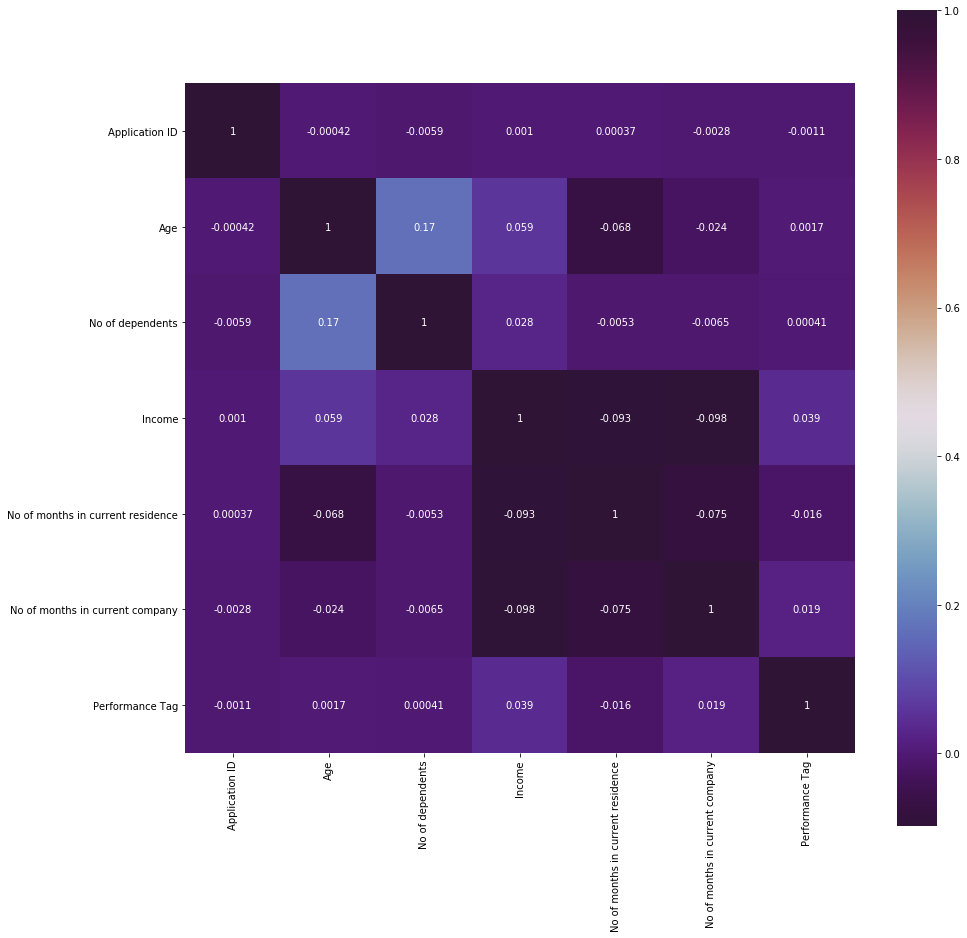

In [48]:
# heat map for corr-relations
plt.figure(figsize=(15,15))
sns.heatmap(dem.corr(),square=True,annot=True,cmap= 'twilight_shifted')
plt.show()

#### Lets view them one by one, firstly we will analyze the Customer basic information
- 'Age', 
- 'Gender', 
- 'Marital Status', 
- 'No of dependents', 
- 'Income', 
- 'Education', 
- 'Profession ', 
- 'Type of residence', 
- 'No of months in current residence', 
- 'No of months in current company', 
- 'Performance Tag'

#### 1. Age

In [49]:
dem['Age'].unique()

array([48, 31, 32, 43, 35, 20, 42, 34, 30, 22, 37, 41, 38, 33, 45, 51, 36,
       29, 40, 19, 25, 28, 50, 27, 26, 49, 47, 39, 17, 44, 23, 46, 52, 53,
       24, 18, 15, 21, 16, 64, 56, 55, 60, 59, 54, 58, 62, 65, 61, 57, 63,
        0, -3], dtype=int64)

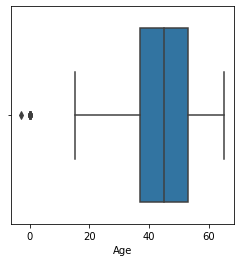

In [50]:
fig = plt.figure(figsize = (4,4))
sns.boxplot(x='Age', data=dem)
plt.show()

##### As we know that there, credit card should be issued to the customers whose Age should be greater than 18, So, we need to impute them

In [51]:
# lets check the number of customers belong to Age less than 18
(dem['Age']<18).value_counts()

False    69802
True        65
Name: Age, dtype: int64

###### "65" rows in which Age is less than the  Age of 18, so we can drop them instead of imputing them with some value

In [52]:
dem = dem[dem['Age']>=18]

In [53]:
# lets check the number of customers belong to Age less than 18
(dem['Age']>=18).value_counts()

True    69802
Name: Age, dtype: int64

In [54]:
# check the shape
dem.shape

(69802, 12)

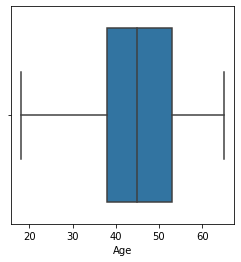

In [55]:
fig = plt.figure(figsize = (4,4))
sns.boxplot(x='Age', data=dem)
plt.show()

###### View the count of age bins 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

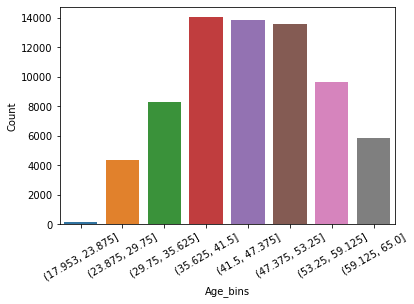

In [56]:
plt.figure(figsize=(6,4))
# creating bins 
dem['Age_bins'] = pd.cut(dem['Age'], 8, duplicates = 'drop')    
# plot for binned variables 
sns.countplot(dem['Age_bins'])    
plt.xlabel('Age_bins')
plt.ylabel('Count')
plt.xticks(rotation = 30)

#### Check the performance tag (target_variable) vs the age bins

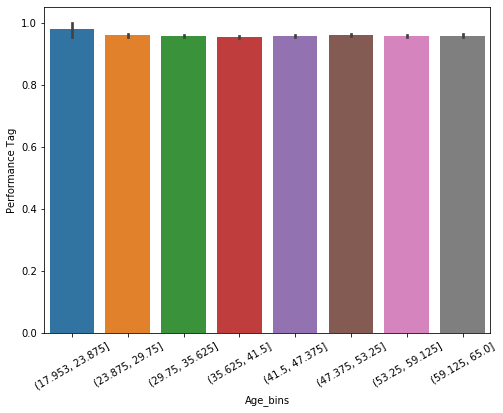

In [57]:
# plot for age binned variables vs target_varibale
fig = plt.figure(figsize=(8,6))
sns.barplot(x = 'Age_bins', y = "Performance Tag", data = dem) 
plt.xticks(rotation=30)
plt.show()

##### Plot Age bins vs the performance rate

Text(0, 0.5, 'Performance rate')

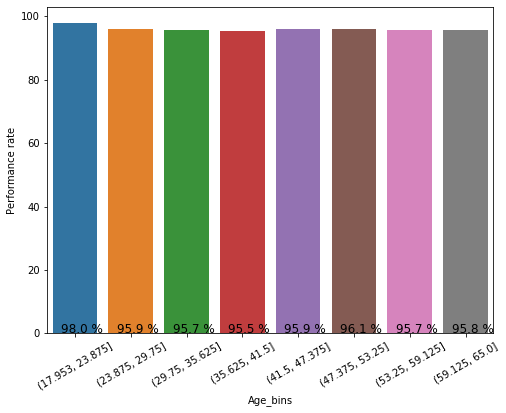

In [58]:
fig = plt.figure(figsize=(8,6))

No_of_prospect = dem.groupby('Age_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = dem[dem['Performance Tag']==1].groupby('Age_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_age_col = No_of_prospect.merge(count_prospects, on='Age_bins')
agg_age_col['performance_rate'] = 100*(agg_age_col['count_prospects']/agg_age_col['No.of_prospect']).round(3)
    

ax = sns.barplot(x='Age_bins', y='performance_rate', data=agg_age_col)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
for i in agg_age_col.index:
    plt.text(x = i-0.25, y = 0.25, s = ''+str(agg_age_col['performance_rate'][i].round(3))+' %',fontsize=12)
plt.xlabel('Age_bins')   
plt.ylabel('Performance rate')

#### Lets create separate functions for above created plots for code standardisation

### Outliers_check function

In [59]:
def outliers_check(df_data,col):
    fig = plt.figure(figsize = (4,4))
    sns.boxplot(x=col, data=df_data)
    plt.title(col)
    plt.show()

### Single feature/column- univariate analysis function

In [60]:
def uni_analysis(df_data,col):
    fig = plt.figure(figsize = (8,6))
    if df_data[col].nunique() > 15:
        col_bins = col+"_bins"
        df_data[col_bins] = pd.cut(df_data[col], 8, duplicates = 'drop')                                 
        sns.countplot(df_data[col_bins])
        plt.xlabel(col_bins)
        plt.title(col_bins)
    else:
        sns.countplot(df_data[col]) 
        plt.xlabel(col)
        plt.title(col)
    
    plt.ylabel('Count')
    plt.xticks(rotation = 30)

### Plot Performance tag (target-variable) with columns -function

In [61]:
def col_target(df_data,col):
    bins_col = col + "_bins"
    fig = plt.figure(figsize=(8,6))
    if dem[col].nunique() > 15:
    
        sns.barplot(x = bins_col, y = "Performance Tag", data = df_data) 
        plt.xticks(rotation=30)
    else:
        sns.barplot(x = col, y = "Performance Tag", data = df_data) 
    plt.title(col)
    plt.show()

### Plot the performance rate with the column in dataframe

In [62]:
def col_perf_rate(df_data,col):
    fig = plt.figure(figsize=(8,6))
    agg_col = "agg_"+col
    
    No_of_prospect = df_data.groupby(col)['Performance Tag'].count().reset_index(name = 'No.of_prospect')
    count_prospects = df_data[df_data['Performance Tag']==1].groupby(col)['Performance Tag'].count().reset_index(name = 'count_prospects')
    agg_col = No_of_prospect.merge(count_prospects, on=col)
    agg_col['default_rate'] = 100*(agg_col['count_prospects']/agg_col['No.of_prospect']).round(3)
    
    ax = sns.barplot(x=col, y='default_rate', data=agg_col)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    for i in agg_col.index:
          plt.text(x = i-0.25, y = 0.25, s = ''+str(agg_col['default_rate'][i].round(3))+' %',fontsize=15)
    plt.xlabel(col)   
    plt.ylabel('Default Rate')
    plt.xticks(rotation = 30)
    

### Bar Count plot for categorical columns

In [63]:
def count_plot(df_data,col):
    fig = plt.figure(figsize = (6,4))
    sns.countplot(dem[col])
    plt.title(col)
    plt.show()

### 2. Gender

In [64]:
dem['Gender'].value_counts()

M    53311
F    16490
Name: Gender, dtype: int64

In [65]:
dem['Gender'].isnull().sum()

1

In [66]:
dem["Gender"] = dem["Gender"].replace(np.nan,"M")

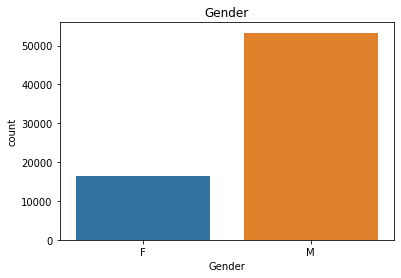

In [67]:
# Gender count plot
count_plot(dem,'Gender')

### 3. Marital Status

In [68]:
dem['Marital Status'].value_counts()

Married    59504
Single     10293
Name: Marital Status, dtype: int64

In [69]:
# check for null values
dem['Marital Status'].isnull().sum()

5

In [70]:
# As married value count is higher, lets replace the null values by married
dem["Marital Status"] = dem["Marital Status"].replace(np.nan,"Married")

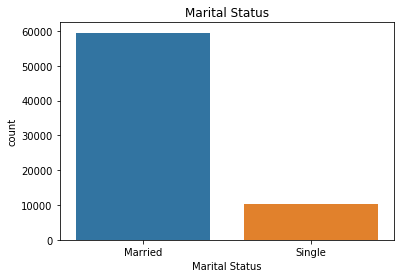

In [71]:
count_plot(dem,"Marital Status")

#### 4. Number of Dependents

In [72]:
dem['No of dependents'].value_counts()

3.0    15627
1.0    15200
2.0    15105
4.0    11995
5.0    11873
Name: No of dependents, dtype: int64

In [73]:
dem["No of dependents"].isnull().sum()

2

In [74]:
dem["No of dependents"] = dem["No of dependents"].replace(np.nan,3.0)

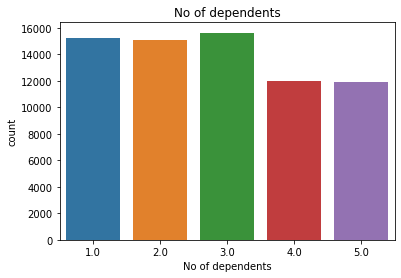

In [75]:
count_plot(dem,"No of dependents")

### 5.Income

In [76]:
dem['Income'].value_counts()

 4.5     4919
 33.0    1434
 31.0    1433
 23.0    1427
 35.0    1426
 26.0    1424
 20.0    1407
 15.0    1376
 21.0    1375
 17.0    1374
 37.0    1367
 39.0    1365
 22.0    1363
 29.0    1357
 28.0    1356
 41.0    1352
 32.0    1348
 16.0    1344
 19.0    1340
 44.0    1337
 10.0    1334
 30.0    1333
 25.0    1330
 13.0    1329
 27.0    1328
 11.0    1319
 40.0    1319
 6.0     1316
 43.0    1314
 34.0    1313
 38.0    1308
 8.0     1305
 18.0    1299
 36.0    1299
 9.0     1291
 14.0    1287
 45.0    1284
 24.0    1277
 7.0     1262
 12.0    1261
 42.0    1244
 5.0     1213
 46.0     925
 49.0     854
 50.0     853
 47.0     844
 48.0     832
 52.0     657
 55.0     652
 54.0     630
 53.0     620
 51.0     598
 56.0     527
 57.0     510
 59.0     491
 58.0     478
 60.0     446
-0.5       80
 4.0       40
 0.0       26
 3.0       23
 1.0       18
 2.0        9
Name: Income, dtype: int64

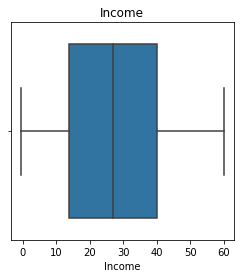

In [77]:
# outlier check for income
outliers_check(dem,'Income')

### 6. Education

In [78]:
dem['Education'].value_counts()

Professional    24363
Masters         23465
Bachelor        17282
Phd              4455
Others            119
Name: Education, dtype: int64

In [79]:
# Education has some null values, lets impute them
dem["Education"].isnull().sum()

118

In [80]:
# lets replace them with "unkown" value
dem["Education"] = dem["Education"].replace(np.nan,"Unknown")

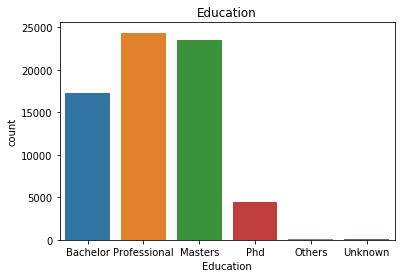

In [81]:
count_plot(dem,"Education")

#### 7. Profession

#### Found that Profession column name has space at the end of the name, it needs to be stripped out and renamed

In [82]:
dem = dem.rename(columns = {"Profession ": "Profession"})

In [83]:
dem['Profession'].value_counts()

SAL        39639
SE_PROF    16236
SE         13915
Name: Profession, dtype: int64

In [84]:
dem["Profession"].isnull().sum()

12

In [85]:
dem["Profession"] = dem["Profession"].replace(np.nan,"SAL")

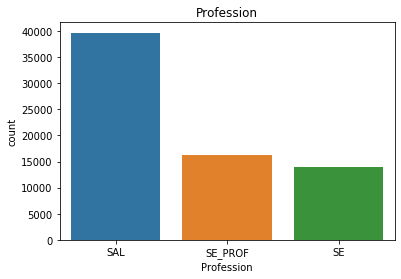

In [86]:
count_plot(dem,"Profession")

### 8. Type of residence

In [87]:
dem['Type of residence'].value_counts()

Rented                 52242
Owned                  13986
Living with Parents     1767
Company provided        1601
Others                   198
Name: Type of residence, dtype: int64

In [88]:
dem["Type of residence"].isnull().sum()

8

In [89]:
# impute null values with most occured category
dem["Type of residence"] = dem["Type of residence"].replace(np.nan,"Rented")

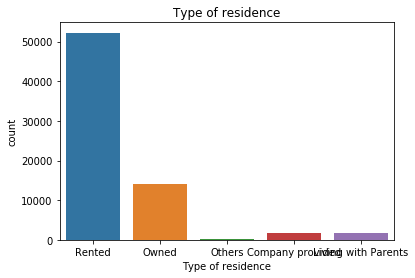

In [90]:
count_plot(dem,"Type of residence")

#### 9. Number of months in current residence

In [91]:
dem['No of months in current residence'].value_counts()

6      33568
14       417
18       402
12       391
29       386
10       386
8        386
11       383
33       380
13       379
15       375
40       375
22       368
39       368
7        367
31       364
9        364
35       364
17       364
16       363
21       362
38       359
20       359
45       358
34       354
27       352
25       351
23       347
42       346
19       345
30       340
53       339
50       337
28       337
52       336
51       336
48       334
41       333
43       331
37       328
47       328
58       326
107      324
26       323
59       322
56       319
32       318
66       317
49       317
24       315
114      314
54       313
36       311
116      306
67       306
44       306
46       305
103      304
112      300
91       300
61       299
94       298
70       297
109      297
76       296
78       295
60       295
101      294
88       294
72       293
57       292
84       291
106      290
102      290
95       289
81       289
83       288

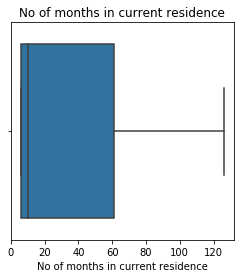

In [92]:
# check for outliers
outliers_check(dem,"No of months in current residence")

#### 10. No of months in current company

In [93]:
dem['No of months in current company'].value_counts()

3      4746
27     1076
38     1068
44     1067
57     1059
54     1059
40     1056
53     1055
43     1052
48     1050
51     1044
41     1041
55     1040
29     1034
24     1033
45     1032
36     1029
56     1027
12     1026
46     1026
52     1025
31     1024
58     1023
42     1022
39     1022
50     1015
19     1014
13     1013
5      1013
34     1011
37     1008
16     1007
26     1007
33     1006
22     1005
30      999
10      987
32      984
35      983
7       983
17      980
23      980
15      978
28      976
25      973
18      972
49      969
8       968
6       966
9       966
14      963
47      962
20      960
21      959
4       925
11      900
62      893
60      888
59      880
61      836
65      507
71      502
64      496
63      488
67      485
70      475
69      472
72      466
66      464
68      460
75      455
73      451
74      406
83        1
91        1
126       1
96        1
133       1
98        1
105       1
121       1
123       1
128       1
Name

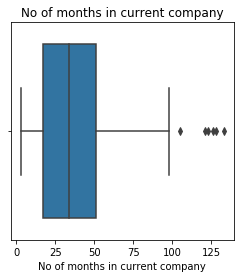

In [94]:
# check outliers
outliers_check(dem,"No of months in current company")

### Plot uni_analysis of columns of demographic data

In [95]:
dem_cols = ['Age', 'Gender', 'Marital Status', 'No of dependents', 'Income', 'Education', 'Profession', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Performance Tag']

In [96]:
dem.columns

Index(['Application ID', 'Age', 'Gender', 'Marital Status', 'No of dependents', 'Income', 'Education', 'Profession', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Performance Tag', 'Age_bins'], dtype='object')

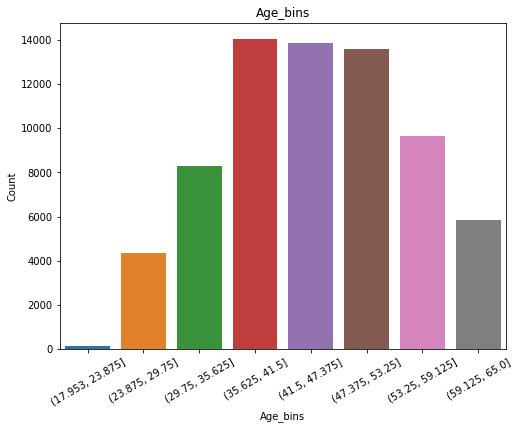

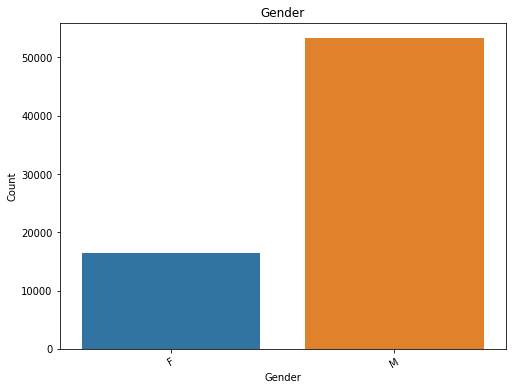

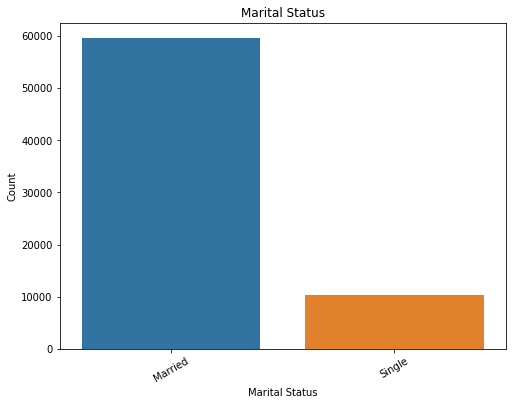

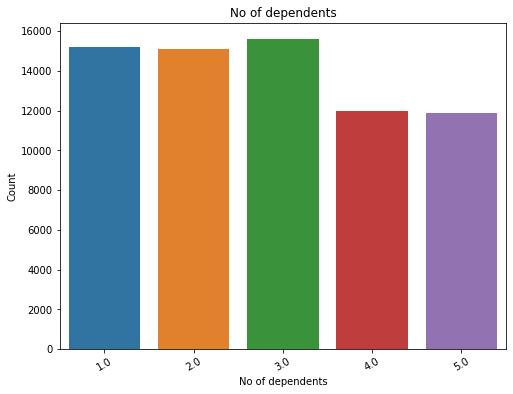

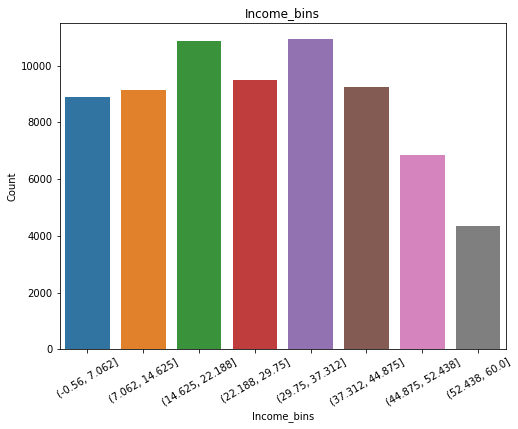

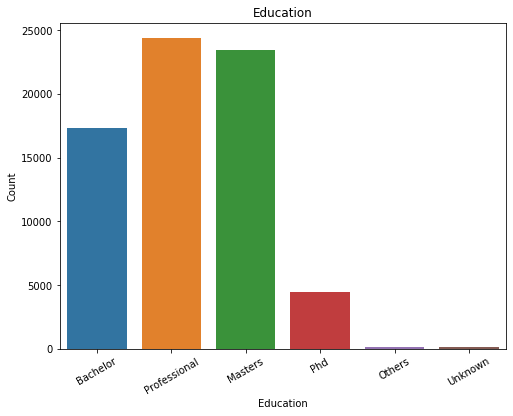

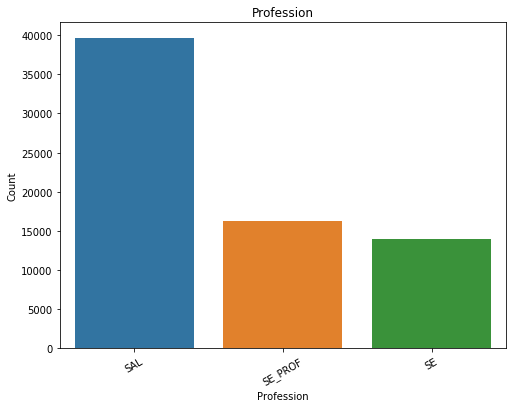

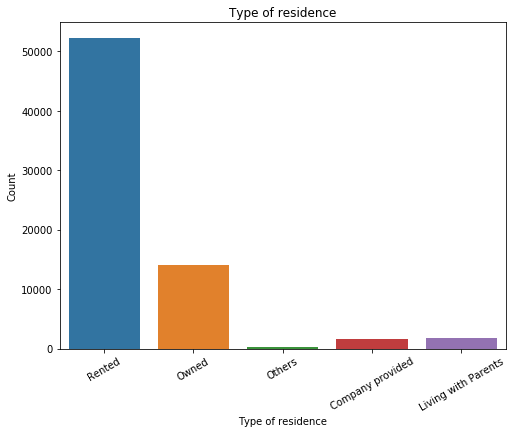

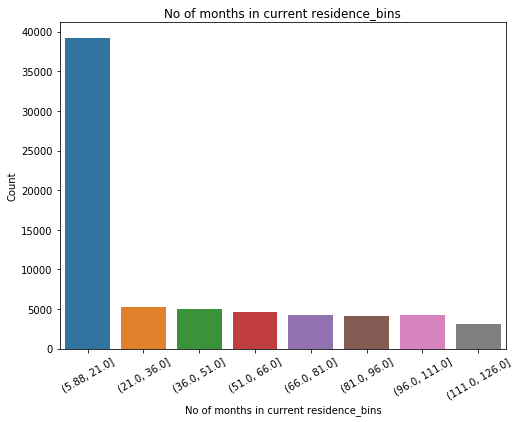

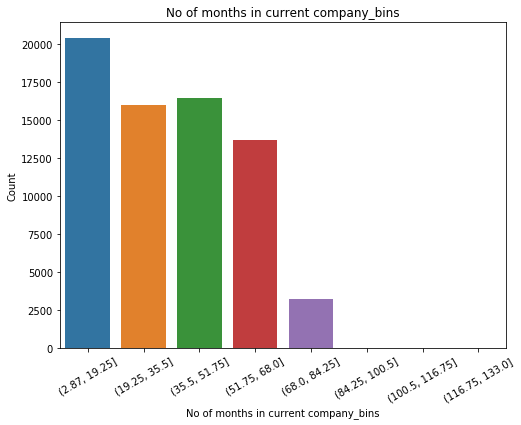

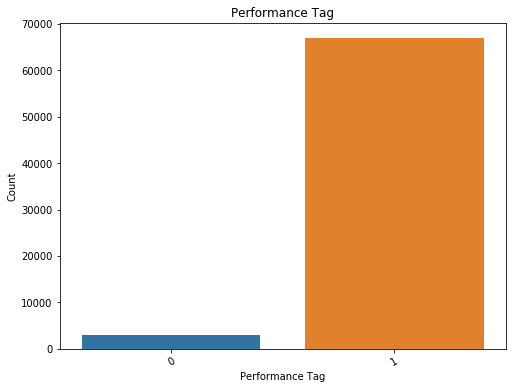

In [97]:
for i in dem_cols:
    uni_analysis(dem,i)

### Plot Performance tag (target-variable) with columns of demographic dataframe

In [98]:
dem_cat_cols = ['Age', 'Gender', 'Marital Status', 'No of dependents', 'Income', 'Education', 'Profession', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Performance Tag', 'Age_bins', 'Income_bins', 'No of months in current residence_bins', 'No of months in current company_bins']

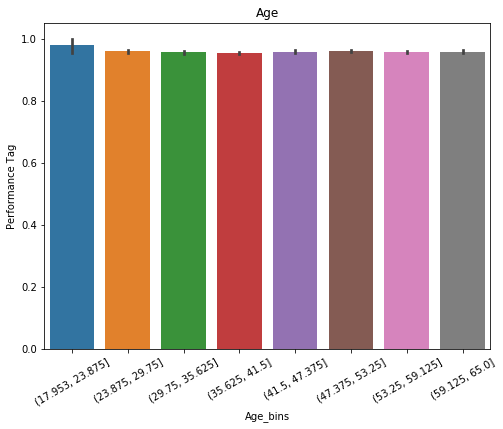

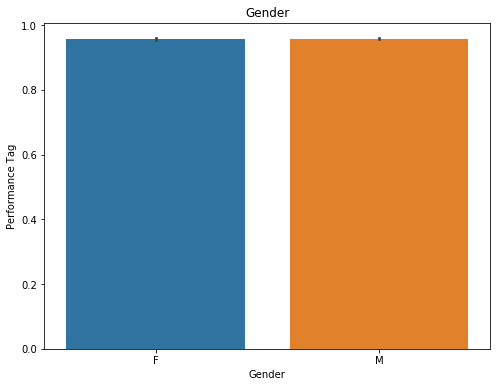

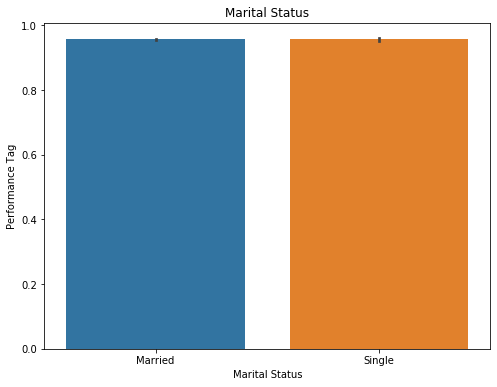

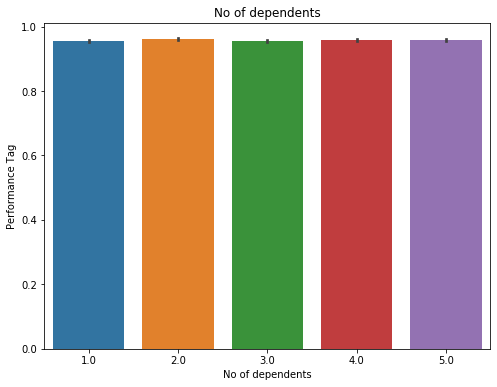

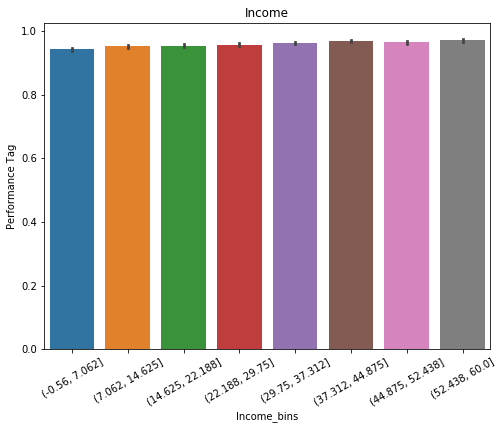

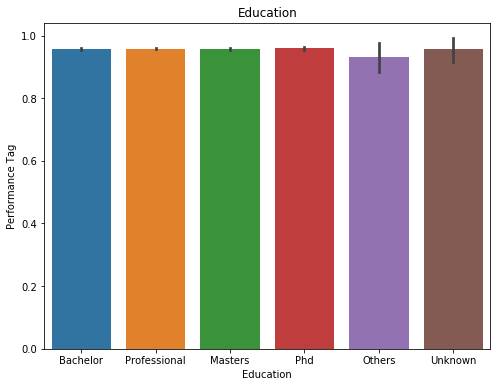

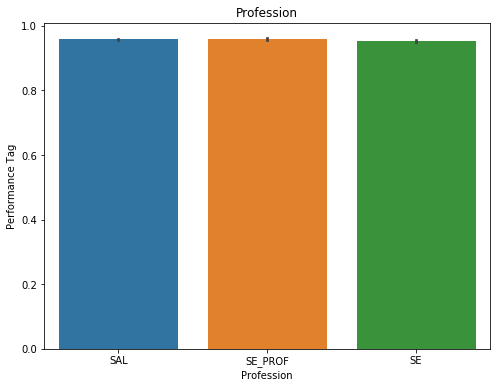

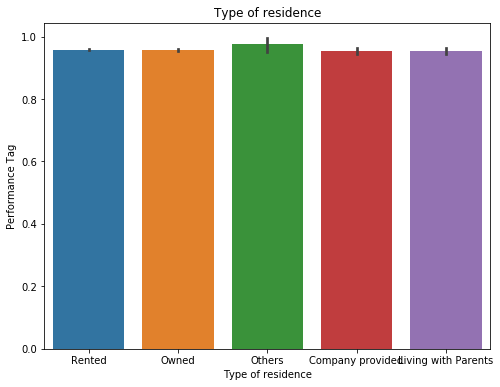

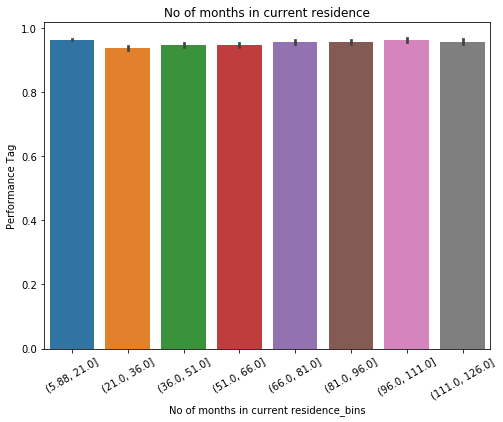

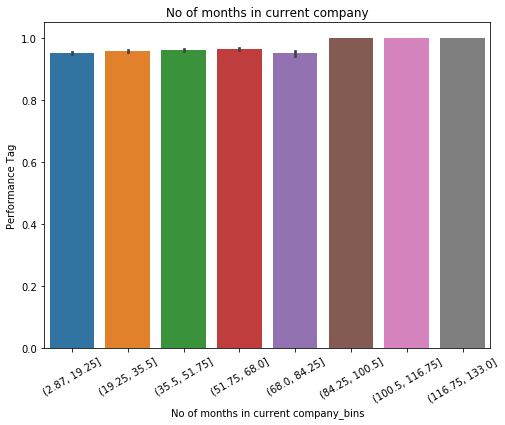

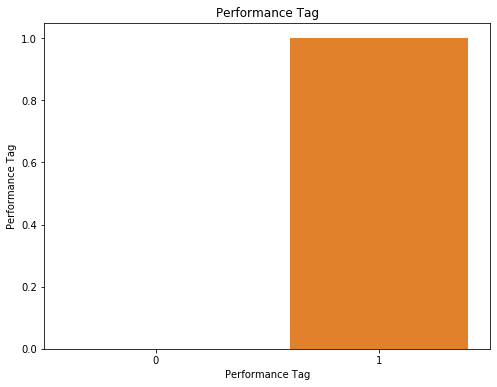

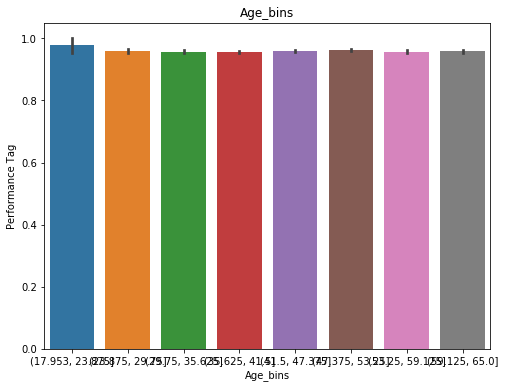

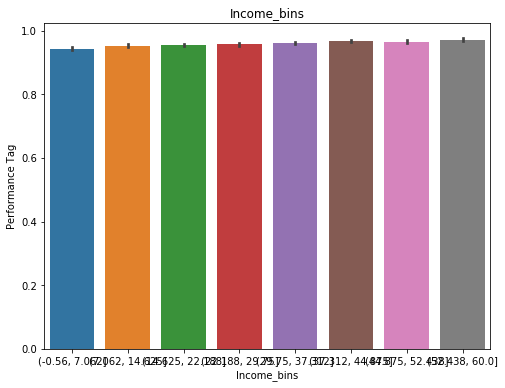

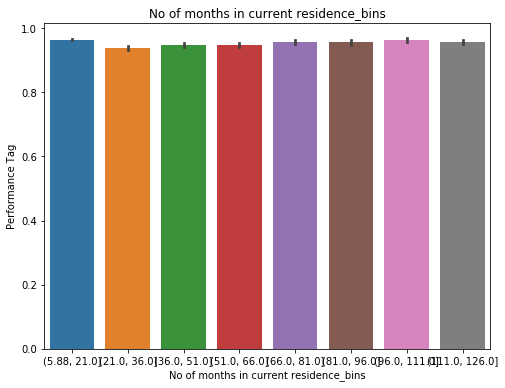

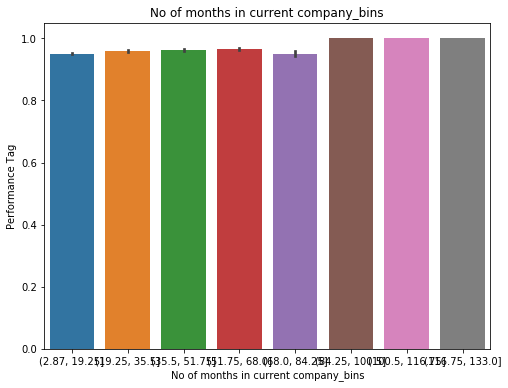

In [99]:
for i in dem_cat_cols:
    col_target(dem,i)

### Plot the performance rate for columns in demographic dataframe

In [100]:
dem_cols_with_bins = ['Gender', 'Marital Status', 'No of dependents', 'Education', 'Profession', 'Type of residence', 'Age_bins', 'Income_bins', 'No of months in current residence_bins', 'No of months in current company_bins']

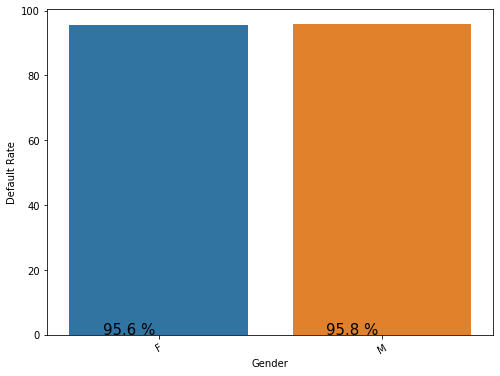

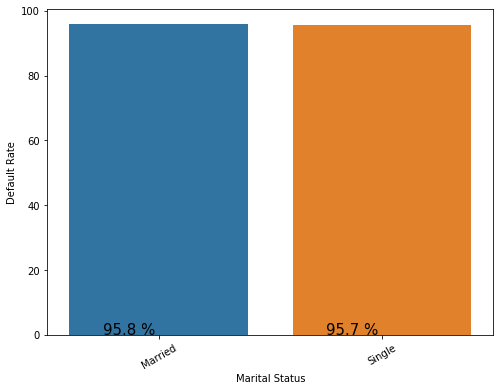

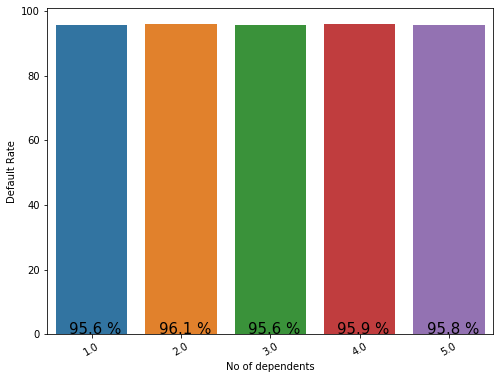

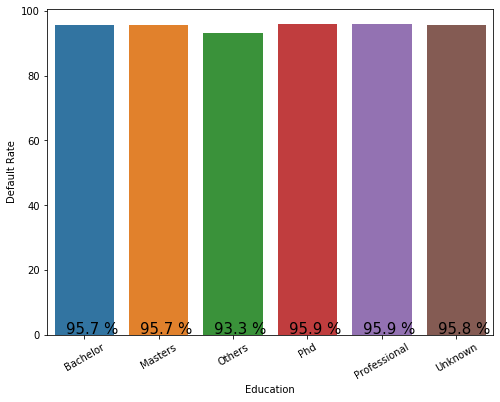

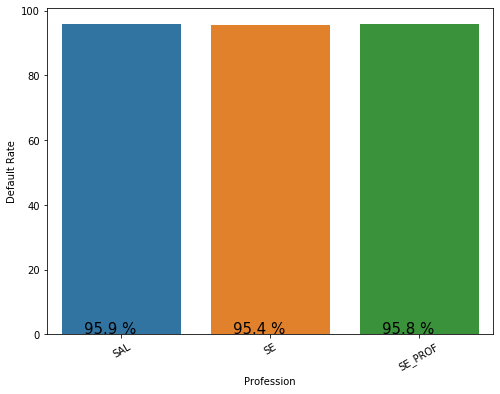

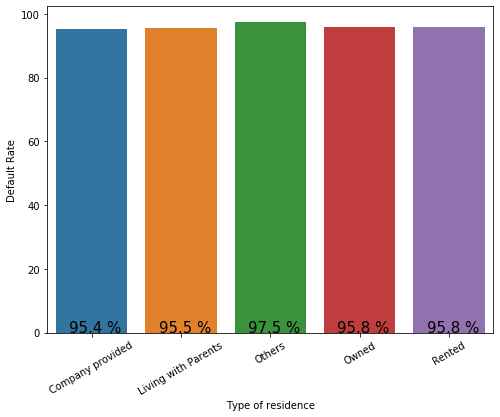

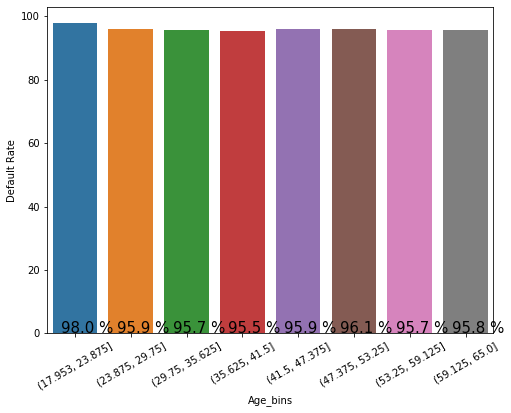

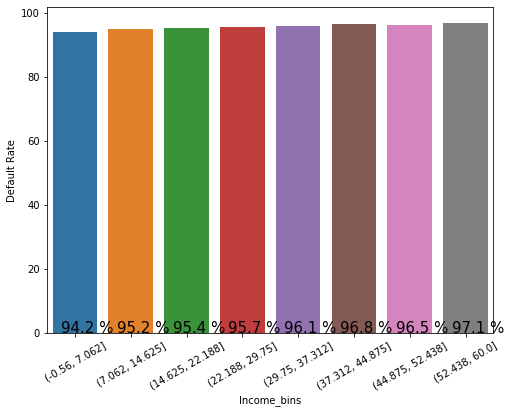

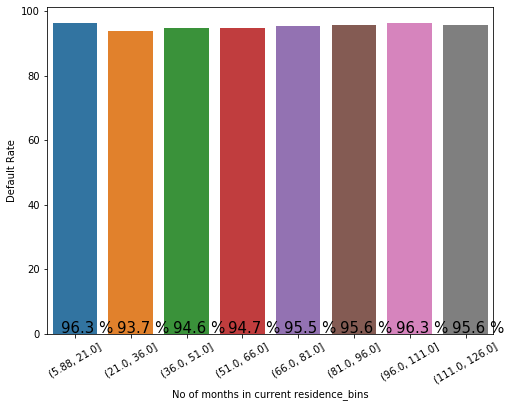

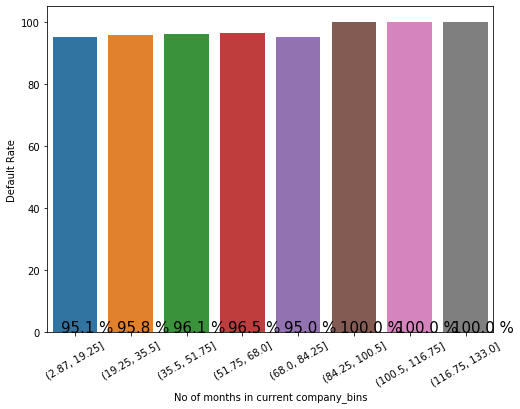

In [101]:
for i in dem_cols_with_bins:
    col_perf_rate(dem,i)

In [102]:
dem.columns

Index(['Application ID', 'Age', 'Gender', 'Marital Status', 'No of dependents', 'Income', 'Education', 'Profession', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Performance Tag', 'Age_bins', 'Income_bins', 'No of months in current residence_bins', 'No of months in current company_bins'], dtype='object')

In [103]:
dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69802 entries, 0 to 71294
Data columns (total 16 columns):
Application ID                            69802 non-null int64
Age                                       69802 non-null int64
Gender                                    69802 non-null object
Marital Status                            69802 non-null object
No of dependents                          69802 non-null float64
Income                                    69802 non-null float64
Education                                 69802 non-null object
Profession                                69802 non-null object
Type of residence                         69802 non-null object
No of months in current residence         69802 non-null int64
No of months in current company           69802 non-null int64
Performance Tag                           69802 non-null int64
Age_bins                                  69802 non-null category
Income_bins                               69802 non-null cat

## Data understanding and processing for  Credit Bureau data

In [104]:
cb.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [105]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71292 non-null int64
No of times 90 DPD or worse in last 6 months                       71292 non-null int64
No of times 60 DPD or worse in last 6 months                       71292 non-null int64
No of times 30 DPD or worse in last 6 months                       71292 non-null int64
No of times 90 DPD or worse in last 12 months                      71292 non-null int64
No of times 60 DPD or worse in last 12 months                      71292 non-null int64
No of times 30 DPD or worse in last 12 months                      71292 non-null int64
Avgas CC Utilization in last 12 months                             70234 non-null float64
No of trades opened in last 6 months                               71291 non-null float64
No of trades opened in last 12 months                              71292 non-null int64
No of P

In [106]:
# check the percentAge of blank rows in the dataframe
(round(100*(cb.isnull().sum()/len(cb.index)), 2))

Application ID                                                     0.00
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                       0.00
No of times 30 DPD or worse in last 6 months                       0.00
No of times 90 DPD or worse in last 12 months                      0.00
No of times 60 DPD or worse in last 12 months                      0.00
No of times 30 DPD or worse in last 12 months                      0.00
Avgas CC Utilization in last 12 months                             1.48
No of trades opened in last 6 months                               0.00
No of trades opened in last 12 months                              0.00
No of PL trades opened in last 6 months                            0.00
No of PL trades opened in last 12 months                           0.00
No of Inquiries in last 6 months (excluding home & auto loans)     0.00
No of Inquiries in last 12 months (excluding home & auto loans) 

#### Lets treat the null values of "Performance Tag" by removing them because we should not impute the output label

In [107]:
# remove the null value rows of performance tag column
cb = cb[~cb["Performance Tag"].isnull()]

In [108]:
cb.shape

(69867, 19)

In [109]:
# Inspet the %Age of null values in the dataset column wise
(round(100*(cb.isnull().sum()/len(cb.index)), 2))

Application ID                                                     0.00
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                       0.00
No of times 30 DPD or worse in last 6 months                       0.00
No of times 90 DPD or worse in last 12 months                      0.00
No of times 60 DPD or worse in last 12 months                      0.00
No of times 30 DPD or worse in last 12 months                      0.00
Avgas CC Utilization in last 12 months                             1.46
No of trades opened in last 6 months                               0.00
No of trades opened in last 12 months                              0.00
No of PL trades opened in last 6 months                            0.00
No of PL trades opened in last 12 months                           0.00
No of Inquiries in last 6 months (excluding home & auto loans)     0.00
No of Inquiries in last 12 months (excluding home & auto loans) 

###### column "Performance tag" treated by removing the null values rows

### Also, we know that in column 'Performance tag', "1" means the default ("bad customer") and "0" means the Good customer. So we can reverse them to avaoid any further confusion, changing the "1" for good customers and "0" for bad customers

In [110]:
cb['Performance Tag'].value_counts()

0.0    66920
1.0     2947
Name: Performance Tag, dtype: int64

In [111]:
cb['Performance Tag'] = cb['Performance Tag'].map({1:0,0:1})

In [112]:
cb['Performance Tag'].value_counts()

1    66920
0     2947
Name: Performance Tag, dtype: int64

###### There are othere null values as well, so lets understand them and imput them 

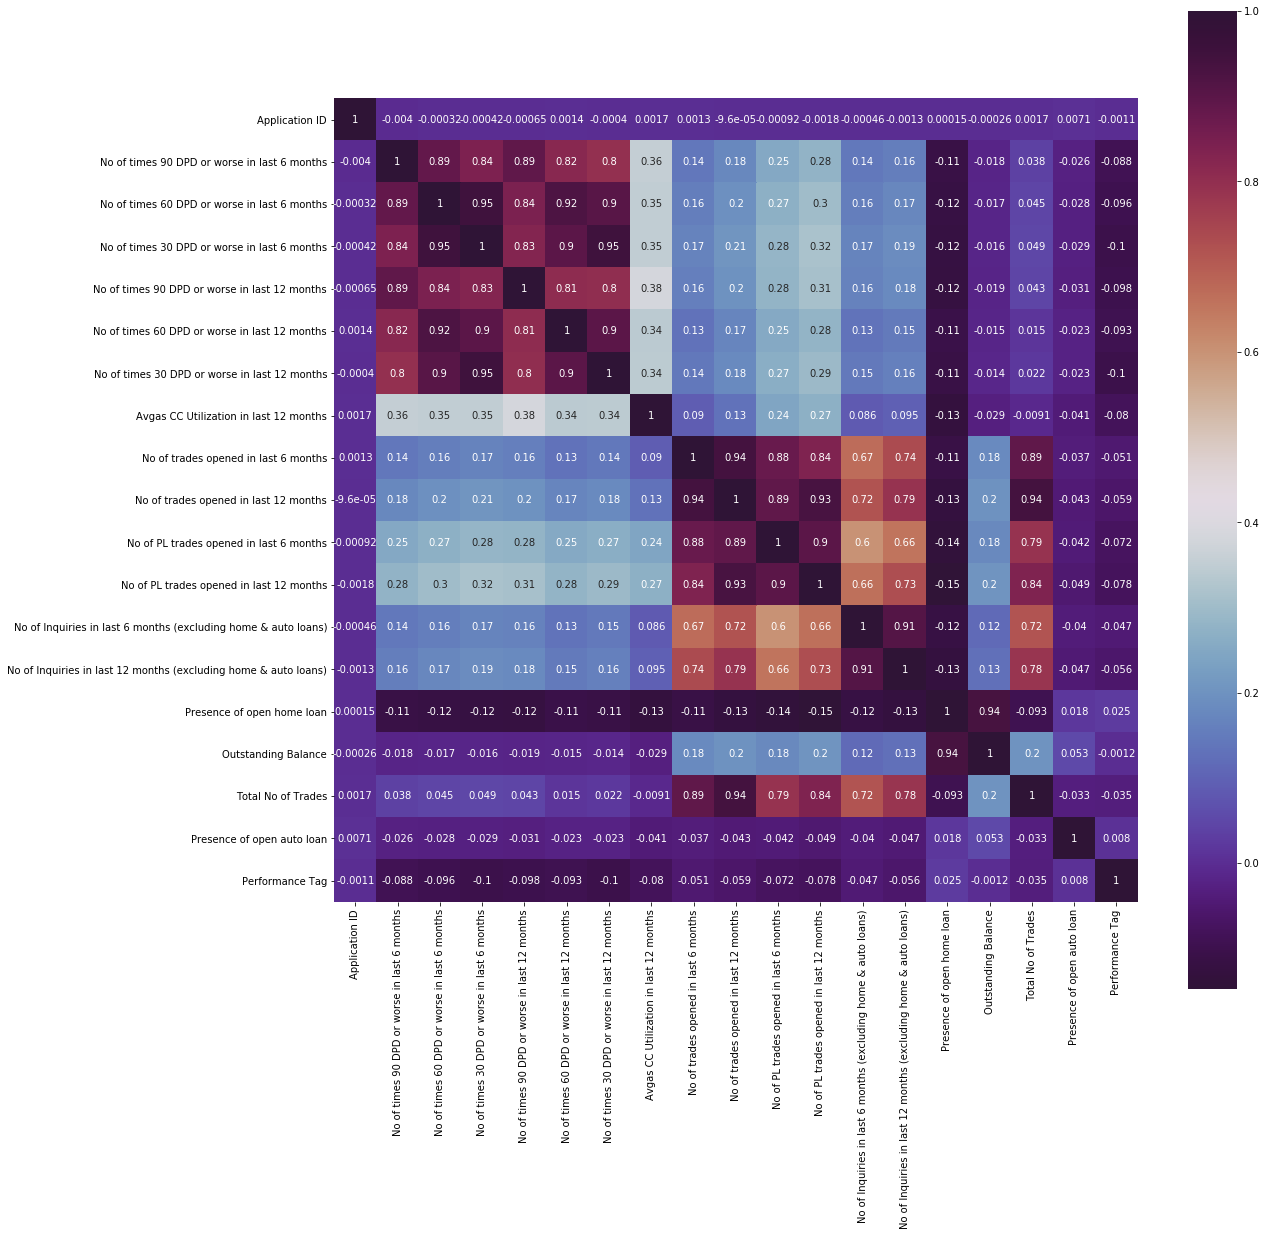

In [113]:
plt.figure(figsize=(18,18))
sns.heatmap(cb.corr(),square=True,annot=True,cmap= 'twilight_shifted')
plt.show()

In [114]:
cb.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,6.986700e+04,69867.000000,69867.000000,69867.000000,69867.000000,69867.000000,69867.000000,68844.000000,69866.000000,69867.000000,69867.000000,69867.000000,69867.000000,69867.000000,69595.000000,6.959500e+04,69867.000000,69867.000000,69867.000000
mean,4.992179e+08,0.248973,0.391673,0.523495,0.414831,0.603375,0.733866,29.263581,2.285117,5.784977,1.189589,2.363462,1.757997,3.525012,0.259659,1.253370e+06,8.174775,0.084876,0.957820
std,2.885551e+08,0.505659,0.771887,1.000760,0.763508,1.021749,1.243168,29.514047,2.081900,5.095437,1.352690,2.423655,1.985052,3.611761,0.438451,1.286182e+06,7.152940,0.278698,0.201001
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.485673e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.083955e+05,3.000000,0.000000,1.000000
50%,4.980015e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,4.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.742410e+05,6.000000,0.000000,1.000000
75%,7.498625e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.926238e+06,10.000000,0.000000,1.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


### Lets impute the missing columns in Credit Bureau dataframe

###### Outstanding Balance

In [115]:
cb["Outstanding Balance"].isnull().sum()

272

In [116]:
cb.loc[cb["Outstanding Balance"].isnull()]

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
10509,479431469,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1
10560,369436570,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1
10583,198567793,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1
10594,771962421,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1
10763,124126752,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1
10785,897124363,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1
10821,127042017,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1
10952,252694179,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1
10958,377993668,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1
10965,757235320,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1


"Outstanding Balance" & "Avgas CC Utilization in last 12 months" has null values for "Total no. of trades" is also 0 which means credit card has never been utilized, we can replace these nan value with 0.

In [117]:
cb["Outstanding Balance"] = cb["Outstanding Balance"].replace(np.nan,0)
cb["Avgas CC Utilization in last 12 months"] = cb["Avgas CC Utilization in last 12 months"].replace(np.nan,0)
cb['Presence of open home loan'] = cb["Presence of open home loan"].replace(np.nan,0)
cb['No of trades opened in last 6 months']=cb['No of trades opened in last 6 months'].replace(np.nan,1)

In [118]:
# Inspet the %Age of null values in the dataset column wise
(round(100*(cb.isnull().sum()/len(cb.index)), 2))

Application ID                                                     0.0
No of times 90 DPD or worse in last 6 months                       0.0
No of times 60 DPD or worse in last 6 months                       0.0
No of times 30 DPD or worse in last 6 months                       0.0
No of times 90 DPD or worse in last 12 months                      0.0
No of times 60 DPD or worse in last 12 months                      0.0
No of times 30 DPD or worse in last 12 months                      0.0
Avgas CC Utilization in last 12 months                             0.0
No of trades opened in last 6 months                               0.0
No of trades opened in last 12 months                              0.0
No of PL trades opened in last 6 months                            0.0
No of PL trades opened in last 12 months                           0.0
No of Inquiries in last 6 months (excluding home & auto loans)     0.0
No of Inquiries in last 12 months (excluding home & auto loans)    0.0
Presen

### Outlier check for columns in Credit Bureau dataframe

In [119]:
cb_cols = ['No of times 90 DPD or worse in last 6 months', 'No of times 60 DPD or worse in last 6 months', 'No of times 30 DPD or worse in last 6 months', 'No of times 90 DPD or worse in last 12 months', 'No of times 60 DPD or worse in last 12 months', 'No of times 30 DPD or worse in last 12 months', 'Avgas CC Utilization in last 12 months', 'No of trades opened in last 6 months', 'No of trades opened in last 12 months', 'No of PL trades opened in last 6 months', 'No of PL trades opened in last 12 months', 'No of Inquiries in last 6 months (excluding home & auto loans)', 'No of Inquiries in last 12 months (excluding home & auto loans)', 'Presence of open home loan', 'Outstanding Balance', 'Total No of Trades', 'Presence of open auto loan']

In [120]:
cb.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months', 'No of times 60 DPD or worse in last 6 months', 'No of times 30 DPD or worse in last 6 months', 'No of times 90 DPD or worse in last 12 months', 'No of times 60 DPD or worse in last 12 months', 'No of times 30 DPD or worse in last 12 months', 'Avgas CC Utilization in last 12 months', 'No of trades opened in last 6 months', 'No of trades opened in last 12 months', 'No of PL trades opened in last 6 months', 'No of PL trades opened in last 12 months', 'No of Inquiries in last 6 months (excluding home & auto loans)', 'No of Inquiries in last 12 months (excluding home & auto loans)', 'Presence of open home loan', 'Outstanding Balance', 'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'], dtype='object')

In [121]:
cb_cols

['No of times 90 DPD or worse in last 6 months',
 'No of times 60 DPD or worse in last 6 months',
 'No of times 30 DPD or worse in last 6 months',
 'No of times 90 DPD or worse in last 12 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of times 30 DPD or worse in last 12 months',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 6 months',
 'No of trades opened in last 12 months',
 'No of PL trades opened in last 6 months',
 'No of PL trades opened in last 12 months',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Presence of open home loan',
 'Outstanding Balance',
 'Total No of Trades',
 'Presence of open auto loan']

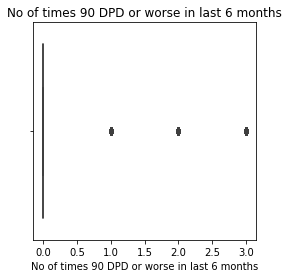

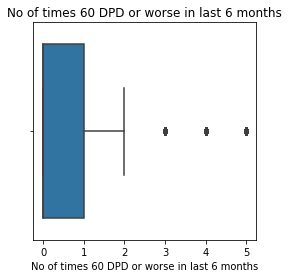

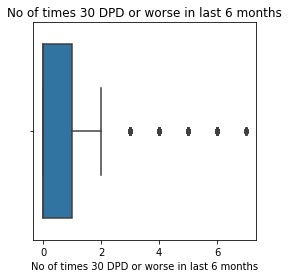

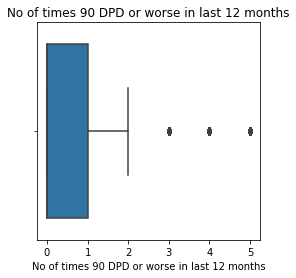

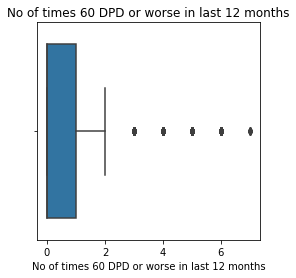

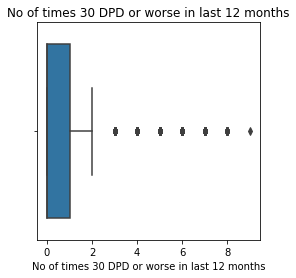

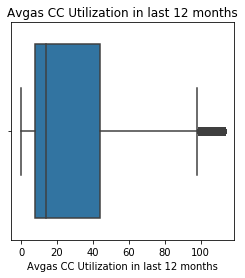

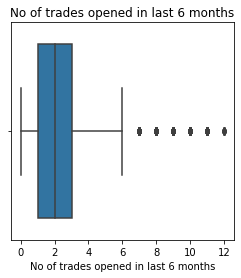

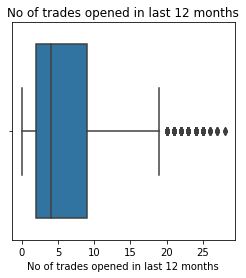

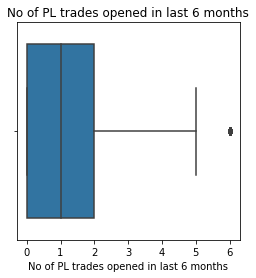

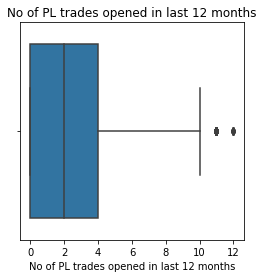

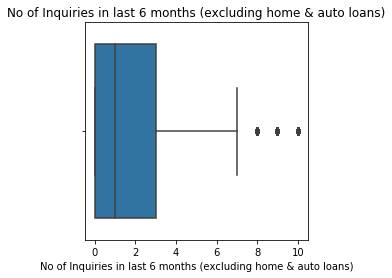

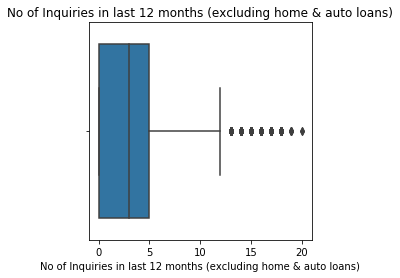

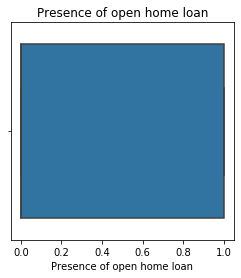

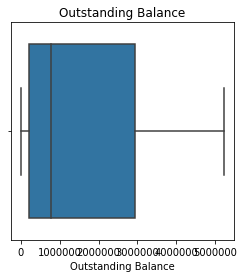

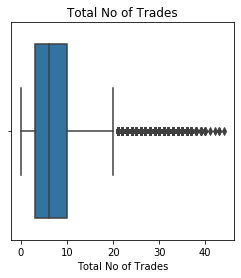

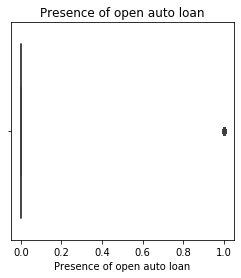

In [122]:
for i in cb_cols:
    outliers_check(cb,i)

### Plot Uni_Anlysis of credit bureau dataframe columns (category)

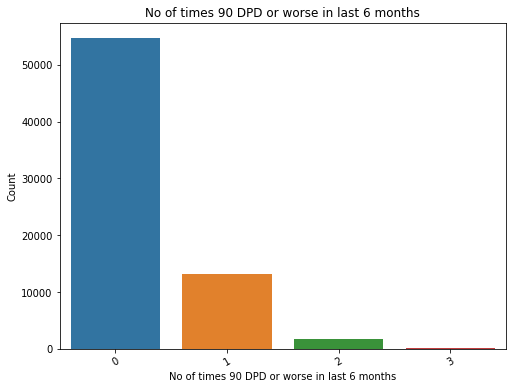

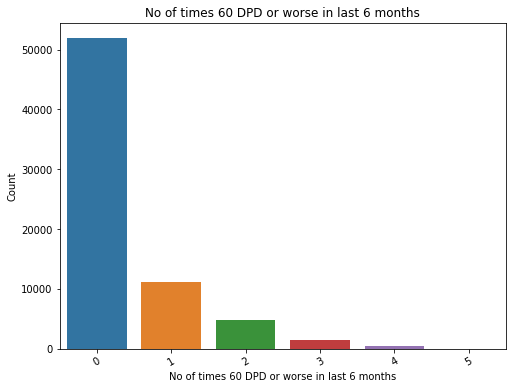

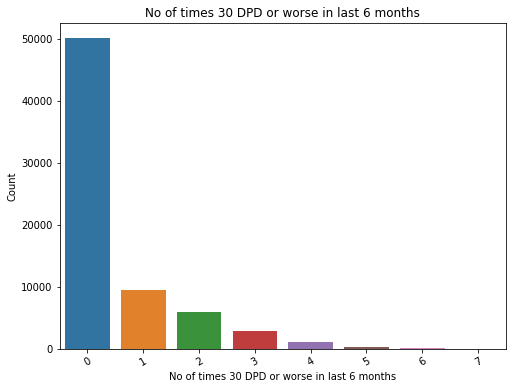

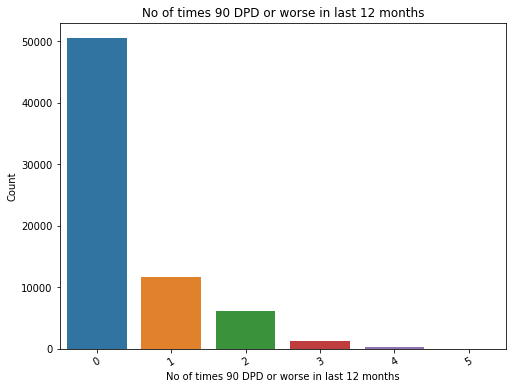

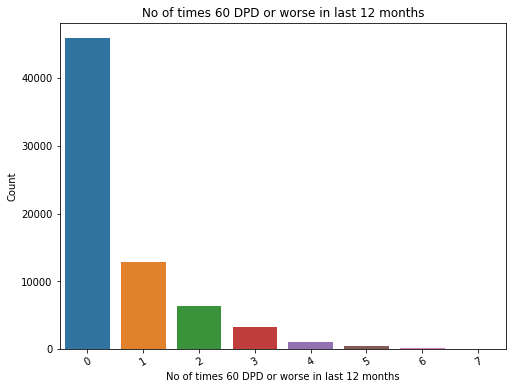

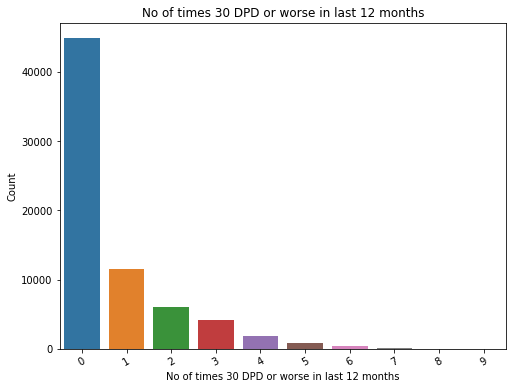

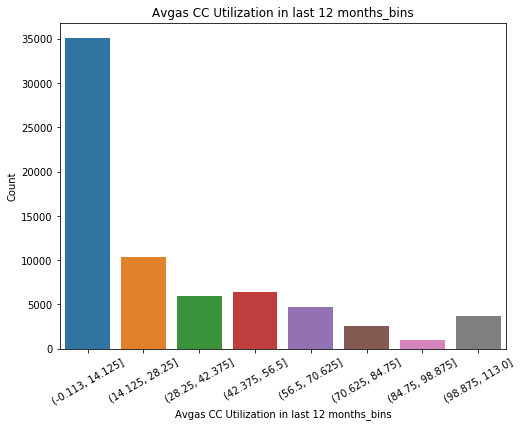

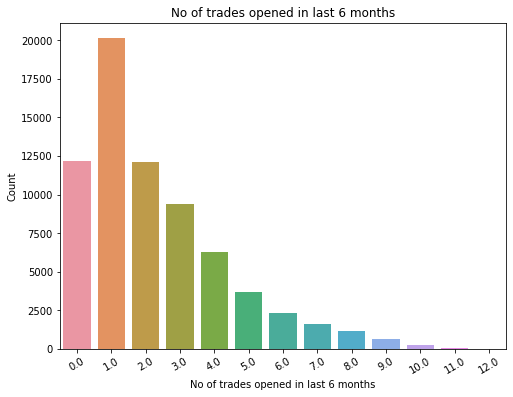

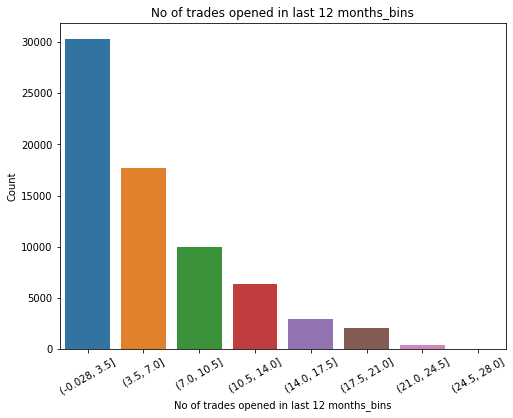

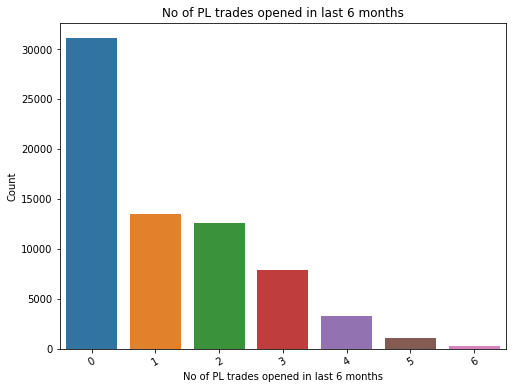

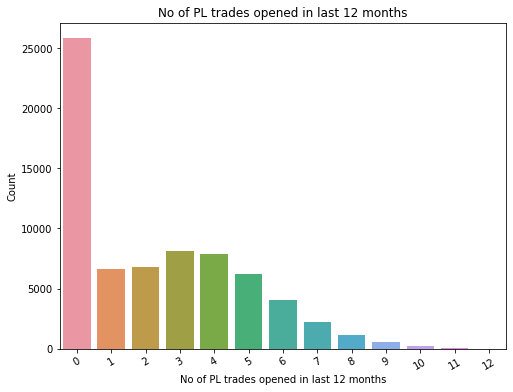

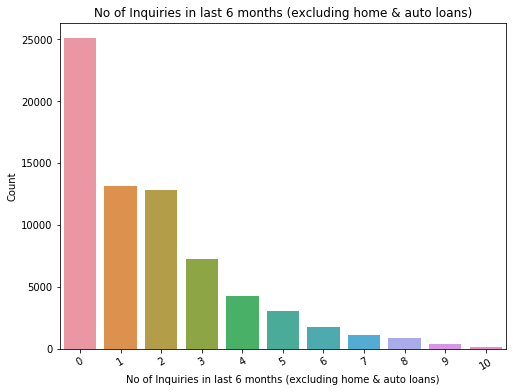

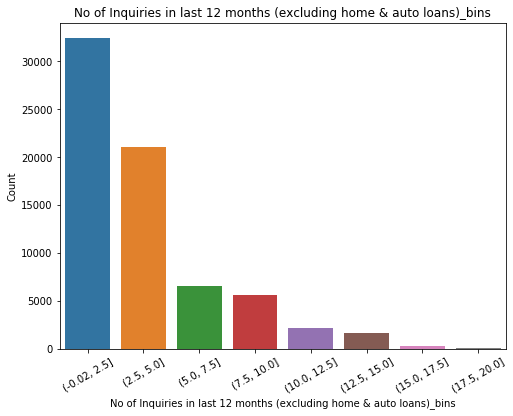

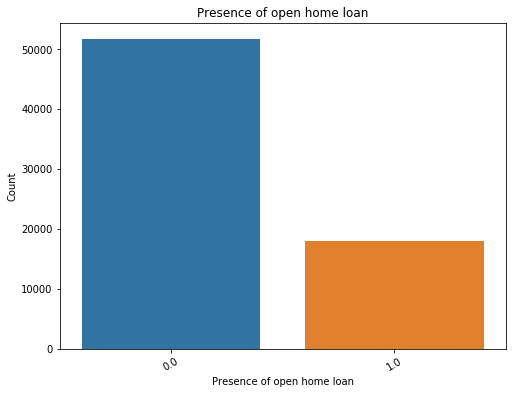

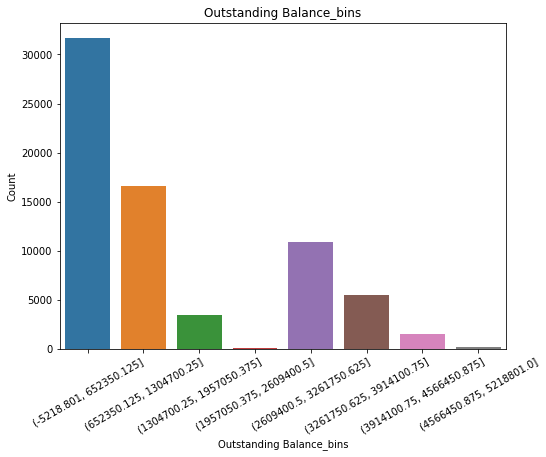

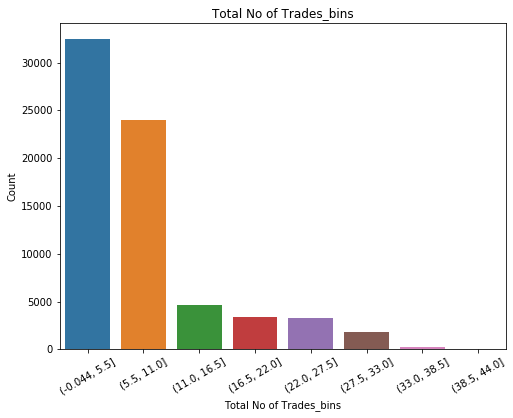

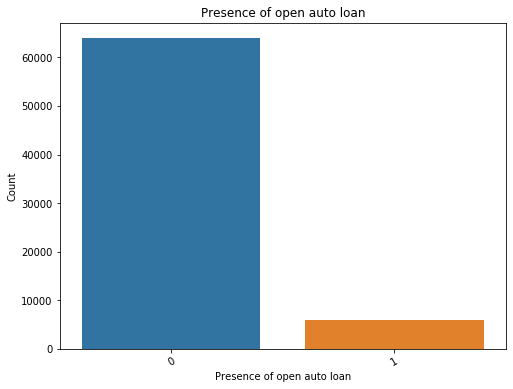

In [123]:
for i in cb_cols:
    uni_analysis(cb,i)

## Create Master Dataset

In [124]:
dem.columns

Index(['Application ID', 'Age', 'Gender', 'Marital Status', 'No of dependents', 'Income', 'Education', 'Profession', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Performance Tag', 'Age_bins', 'Income_bins', 'No of months in current residence_bins', 'No of months in current company_bins'], dtype='object')

In [125]:
cb.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months', 'No of times 60 DPD or worse in last 6 months', 'No of times 30 DPD or worse in last 6 months', 'No of times 90 DPD or worse in last 12 months', 'No of times 60 DPD or worse in last 12 months', 'No of times 30 DPD or worse in last 12 months', 'Avgas CC Utilization in last 12 months', 'No of trades opened in last 6 months', 'No of trades opened in last 12 months', 'No of PL trades opened in last 6 months', 'No of PL trades opened in last 12 months', 'No of Inquiries in last 6 months (excluding home & auto loans)', 'No of Inquiries in last 12 months (excluding home & auto loans)', 'Presence of open home loan', 'Outstanding Balance', 'Total No of Trades', 'Presence of open auto loan', 'Performance Tag', 'Avgas CC Utilization in last 12 months_bins', 'No of trades opened in last 12 months_bins', 'No of Inquiries in last 12 months (excluding home & auto loans)_bins', 'Outstanding Balance_bins',
       'Total No of Trad

### Drop bins columns from the dataframes for further analysis and model building

In [126]:
dem = dem.drop(['Age_bins', 'Income_bins', 'No of months in current residence_bins', 'No of months in current company_bins'],axis=1)
cb = cb.drop(['Avgas CC Utilization in last 12 months_bins', 'No of trades opened in last 12 months_bins', 'No of Inquiries in last 12 months (excluding home & auto loans)_bins', 'Outstanding Balance_bins','Total No of Trades_bins'],axis=1)

In [127]:
dem.columns

Index(['Application ID', 'Age', 'Gender', 'Marital Status', 'No of dependents', 'Income', 'Education', 'Profession', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Performance Tag'], dtype='object')

In [128]:
cb.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months', 'No of times 60 DPD or worse in last 6 months', 'No of times 30 DPD or worse in last 6 months', 'No of times 90 DPD or worse in last 12 months', 'No of times 60 DPD or worse in last 12 months', 'No of times 30 DPD or worse in last 12 months', 'Avgas CC Utilization in last 12 months', 'No of trades opened in last 6 months', 'No of trades opened in last 12 months', 'No of PL trades opened in last 6 months', 'No of PL trades opened in last 12 months', 'No of Inquiries in last 6 months (excluding home & auto loans)', 'No of Inquiries in last 12 months (excluding home & auto loans)', 'Presence of open home loan', 'Outstanding Balance', 'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'], dtype='object')

In [129]:
#Combining Credit Bureau Data and Demographic data into a single data set 
master=pd.merge(dem,cb,how='inner',on='Application ID',suffixes=('_dem', '_cb'))

In [130]:
master.columns

Index(['Application ID', 'Age', 'Gender', 'Marital Status', 'No of dependents', 'Income', 'Education', 'Profession', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Performance Tag_dem', 'No of times 90 DPD or worse in last 6 months', 'No of times 60 DPD or worse in last 6 months', 'No of times 30 DPD or worse in last 6 months', 'No of times 90 DPD or worse in last 12 months', 'No of times 60 DPD or worse in last 12 months', 'No of times 30 DPD or worse in last 12 months', 'Avgas CC Utilization in last 12 months', 'No of trades opened in last 6 months', 'No of trades opened in last 12 months', 'No of PL trades opened in last 6 months', 'No of PL trades opened in last 12 months', 'No of Inquiries in last 6 months (excluding home & auto loans)', 'No of Inquiries in last 12 months (excluding home & auto loans)', 'Presence of open home loan', 'Outstanding Balance', 'Total No of Trades', 'Presence of open auto loan', 'Performance Tag_cb'], dtype

In [131]:
master.head()

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag_dem,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_cb
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,1,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,1
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,1,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,1
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,1,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,1
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,1,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,1
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,1,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,1


In [132]:
master.shape

(69802, 30)

In [133]:
master.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69802 entries, 0 to 69801
Data columns (total 30 columns):
Application ID                                                     69802 non-null int64
Age                                                                69802 non-null int64
Gender                                                             69802 non-null object
Marital Status                                                     69802 non-null object
No of dependents                                                   69802 non-null float64
Income                                                             69802 non-null float64
Education                                                          69802 non-null object
Profession                                                         69802 non-null object
Type of residence                                                  69802 non-null object
No of months in current residence                                  69802 non-null int64
No

In [134]:
# Analysisng Performance Tag columns
master['Performance Tag_dem'].value_counts()

1    66856
0     2946
Name: Performance Tag_dem, dtype: int64

In [135]:
master['Performance Tag_cb'].value_counts()

1    66856
0     2946
Name: Performance Tag_cb, dtype: int64

In [136]:
master['Performance Tag_cb'].isnull().sum()

0

In [137]:
master.isnull().sum()

Application ID                                                     0
Age                                                                0
Gender                                                             0
Marital Status                                                     0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag_dem                                                0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in las

### WOE and IV for demographic DataFrame

In [138]:
dem2=dem
#Creating a copy of dem DF
dem2.head()

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,1
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,1
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,1
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,1
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,1


In [139]:
#Dropping Application ID from dem2
dem2=dem2.drop('Application ID',axis=1)

In [140]:
dem2.columns

Index(['Age', 'Gender', 'Marital Status', 'No of dependents', 'Income', 'Education', 'Profession', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Performance Tag'], dtype='object')

In [141]:
dem2.shape

(69802, 11)

In [142]:
#Creating bins for the columns which has more than 15 unique entries
dem2_bins=[]
dem2cols=dem2.columns
for i in dem2cols:
    if dem2[i].nunique()>15:
        dem2_bins.append(i)
dem2_bins


['Age',
 'Income',
 'No of months in current residence',
 'No of months in current company']

In [143]:
dem2_vars=[]
for i in dem2cols:
    if dem2[i].nunique()<=15:
        dem2_vars.append(i)
dem2_vars

['Gender',
 'Marital Status',
 'No of dependents',
 'Education',
 'Profession',
 'Type of residence',
 'Performance Tag']

In [144]:
#defining IV and WOE function

def iv_woe(data, target, bins, show_woe=False):
    
    
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    cols = data.columns
    
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>15):
            
            binned_x = pd.cut(data[ivars], bins, include_lowest=False)
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events'] - d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [145]:
iv_d, woe_d = iv_woe(data = dem2, target = 'Performance Tag', bins=8, show_woe = True)

Information value of Age is 0.003216
  Variable            Cutoff      N  Events  % of Events  Non-Events  % of Non-Events       WoE        IV
0      Age  (17.953, 23.875]    149     146     0.002184           3         0.001018 -0.762902  0.000889
1      Age   (23.875, 29.75]   4346    4167     0.062328         179         0.060760 -0.025473  0.000040
2      Age   (29.75, 35.625]   8315    7955     0.118987         360         0.122200  0.026641  0.000086
3      Age    (35.625, 41.5]  14053   13420     0.200730         633         0.214868  0.068062  0.000962
4      Age    (41.5, 47.375]  13837   13265     0.198412         572         0.194162 -0.021653  0.000092
5      Age   (47.375, 53.25]  13584   13050     0.195196         534         0.181263 -0.074055  0.001032
6      Age   (53.25, 59.125]   9661    9242     0.138237         419         0.142227  0.028450  0.000113
7      Age    (59.125, 65.0]   5857    5611     0.083927         246         0.083503 -0.005060  0.000002
Informati

In [146]:
woe_d

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Age,"(17.953, 23.875]",149,146,0.002184,3,0.001018,-0.762902,8.891375e-04
1,Age,"(23.875, 29.75]",4346,4167,0.062328,179,0.060760,-0.025473,3.993252e-05
2,Age,"(29.75, 35.625]",8315,7955,0.118987,360,0.122200,0.026641,8.558408e-05
3,Age,"(35.625, 41.5]",14053,13420,0.200730,633,0.214868,0.068062,9.622359e-04
4,Age,"(41.5, 47.375]",13837,13265,0.198412,572,0.194162,-0.021653,9.202192e-05
5,Age,"(47.375, 53.25]",13584,13050,0.195196,534,0.181263,-0.074055,1.031800e-03
6,Age,"(53.25, 59.125]",9661,9242,0.138237,419,0.142227,0.028450,1.134970e-04
7,Age,"(59.125, 65.0]",5857,5611,0.083927,246,0.083503,-0.005060,2.143367e-06
0,Gender,F,16490,15772,0.235910,718,0.243720,0.032571,2.543872e-04
1,Gender,M,53312,51084,0.764090,2228,0.756280,-0.010274,8.024504e-05


In [147]:
#Importance of varibale
iv_d.sort_values(by = 'IV',ascending = False)

,Variable,IV
0,Income,0.041241
0,No of months in current residence,0.038647
0,No of months in current company,0.019333
0,Age,0.003216
0,No of dependents,0.002607
0,Profession,0.002232
0,Type of residence,0.000945
0,Education,0.000767
0,Gender,0.000335
0,Marital Status,0.000091


In [148]:
# IV less than .02 is not useful to prediction, So lets remove those variables
dem_imp_cols = iv_d[iv_d["IV"] > 0.02]
dem_imp_cols.sort_values(by="IV",ascending = False)

,Variable,IV
0,Income,0.041241
0,No of months in current residence,0.038647


In [149]:
# Building new data set with woe value
dem_woe=dem2

In [150]:
#Replacing actual values with WOE variables
for var in dem2_bins:
    small_df = woe_d[woe_d['Variable'] == var]
    for index, row in small_df.iterrows():
        left = int(round(row.Cutoff.left,0)) 
        right = int(round(row.Cutoff.right,0))
        dem_woe[var] = dem_woe[var].replace(range(left,right),row.WoE)

for var in dem2_vars:
    small_df = woe_d[woe_d['Variable'] == var]
    for index, row in small_df.iterrows():
        dem_woe[var] = dem_woe[var].replace(row.Cutoff,row.WoE)

In [151]:
dem_woe.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,-0.074055,0.032571,-0.003991,-0.084256,-0.275755,0.016496,-0.028106,-0.004372,0.034063,-0.203322,1
1,0.026641,-0.010274,-0.003991,-0.025561,-0.391110,-0.017650,-0.014173,-0.004372,0.034063,-0.084034,1
2,0.026641,-0.010274,0.022792,-0.084256,-0.188844,0.016496,-0.014173,-0.004372,-0.128674,-0.084034,1
3,-0.021653,-0.010274,-0.003991,0.040706,-0.391110,0.016496,0.091560,-0.004372,0.051121,-0.203322,1
4,0.026641,0.032571,-0.003991,0.003949,-0.275755,-0.017650,-0.028106,-0.004372,0.034063,-0.084034,1


In [152]:
dem_woe.isnull().sum()

Age                                  0
Gender                               0
Marital Status                       0
No of dependents                     0
Income                               0
Education                            0
Profession                           0
Type of residence                    0
No of months in current residence    0
No of months in current company      0
Performance Tag                      0
dtype: int64

### WOE and IV for demographic DataFrame

In [153]:
#Creating copy of master dataset
master_2=master
master_2=master_2.drop(['Application ID','Performance Tag_dem'],axis=1)

In [154]:
master_2.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_cb
0,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,1
1,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,1
2,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,1
3,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,1
4,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,1


In [155]:
#Creating bins for the columns having more than 15 unique values
master2_bins = []

master2_cols = master_2.columns
for i in master2_cols:
    if master_2[i].nunique() > 15:
        master2_bins.append(i)
        
master2_bins

['Age',
 'Income',
 'No of months in current residence',
 'No of months in current company',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 12 months',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Outstanding Balance',
 'Total No of Trades']

In [156]:
#non binned variables
master2_vars =[]
for i in master2_cols:
    if master_2[i].nunique() <= 15:
        master2_vars.append(i)
master2_vars

['Gender',
 'Marital Status',
 'No of dependents',
 'Education',
 'Profession',
 'Type of residence',
 'No of times 90 DPD or worse in last 6 months',
 'No of times 60 DPD or worse in last 6 months',
 'No of times 30 DPD or worse in last 6 months',
 'No of times 90 DPD or worse in last 12 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of times 30 DPD or worse in last 12 months',
 'No of trades opened in last 6 months',
 'No of PL trades opened in last 6 months',
 'No of PL trades opened in last 12 months',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'Presence of open home loan',
 'Presence of open auto loan',
 'Performance Tag_cb']

In [157]:
#calling the function
iv_m, woe_m = iv_woe(data = master_2, target = 'Performance Tag_cb', bins=8, show_woe = True)

Information value of Age is 0.003216
  Variable            Cutoff      N  Events  % of Events  Non-Events  % of Non-Events       WoE        IV
0      Age  (17.953, 23.875]    149     146     0.002184           3         0.001018 -0.762902  0.000889
1      Age   (23.875, 29.75]   4346    4167     0.062328         179         0.060760 -0.025473  0.000040
2      Age   (29.75, 35.625]   8315    7955     0.118987         360         0.122200  0.026641  0.000086
3      Age    (35.625, 41.5]  14053   13420     0.200730         633         0.214868  0.068062  0.000962
4      Age    (41.5, 47.375]  13837   13265     0.198412         572         0.194162 -0.021653  0.000092
5      Age   (47.375, 53.25]  13584   13050     0.195196         534         0.181263 -0.074055  0.001032
6      Age   (53.25, 59.125]   9661    9242     0.138237         419         0.142227  0.028450  0.000113
7      Age    (59.125, 65.0]   5857    5611     0.083927         246         0.083503 -0.005060  0.000002
Informati

Information value of No of times 60 DPD or worse in last 6 months is 0.211382
                                       Variable  Cutoff      N  Events  % of Events  Non-Events  % of Non-Events       WoE        IV
0  No of times 60 DPD or worse in last 6 months       0  51815   50234     0.751376        1581         0.536660 -0.336542  0.072261
1  No of times 60 DPD or worse in last 6 months       1  11125   10342     0.154691         783         0.265784  0.541257  0.060130
2  No of times 60 DPD or worse in last 6 months       2   4914    4525     0.067683         389         0.132043  0.668299  0.043012
3  No of times 60 DPD or worse in last 6 months       3   1468    1320     0.019744         148         0.050238  0.933918  0.028479
4  No of times 60 DPD or worse in last 6 months       4    410     371     0.005549          39         0.013238  0.869452  0.006685
5  No of times 60 DPD or worse in last 6 months       5     70      64     0.000957           6         0.002037  0.754969  

12  No of trades opened in last 6 months    12.0     11      11     0.000165           0         0.000170  0.031050  1.611177e-07
Information value of No of trades opened in last 12 months is 0.243557
                                Variable         Cutoff      N  Events  % of Events  Non-Events  % of Non-Events       WoE        IV
0  No of trades opened in last 12 months  (-0.028, 3.5]  30285   29621     0.443057         664         0.225390 -0.675864  0.147113
1  No of trades opened in last 12 months     (3.5, 7.0]  17685   16710     0.249940         975         0.330957  0.280768  0.022747
2  No of trades opened in last 12 months    (7.0, 10.5]   9987    9269     0.138641         718         0.243720  0.564132  0.059278
3  No of trades opened in last 12 months   (10.5, 14.0]   6367    5992     0.089625         375         0.127291  0.350838  0.013215
4  No of trades opened in last 12 months   (14.0, 17.5]   2919    2805     0.041956         114         0.038697 -0.080868  0.000264
5

In [158]:
woe_m.head(15)

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Age,"(17.953, 23.875]",149,146,0.002184,3,0.001018,-0.762902,0.000889
1,Age,"(23.875, 29.75]",4346,4167,0.062328,179,0.060760,-0.025473,0.000040
2,Age,"(29.75, 35.625]",8315,7955,0.118987,360,0.122200,0.026641,0.000086
3,Age,"(35.625, 41.5]",14053,13420,0.200730,633,0.214868,0.068062,0.000962
4,Age,"(41.5, 47.375]",13837,13265,0.198412,572,0.194162,-0.021653,0.000092
5,Age,"(47.375, 53.25]",13584,13050,0.195196,534,0.181263,-0.074055,0.001032
6,Age,"(53.25, 59.125]",9661,9242,0.138237,419,0.142227,0.028450,0.000113
7,Age,"(59.125, 65.0]",5857,5611,0.083927,246,0.083503,-0.005060,0.000002
0,Gender,F,16490,15772,0.235910,718,0.243720,0.032571,0.000254
1,Gender,M,53312,51084,0.764090,2228,0.756280,-0.010274,0.000080


In [159]:
#Variable importance
iv_m.sort_values(by = 'IV',ascending = False)

,Variable,IV
0,No of PL trades opened in last 12 months,0.299134
0,Avgas CC Utilization in last 12 months,0.292953
0,No of times 30 DPD or worse in last 6 months,0.244403
0,No of trades opened in last 12 months,0.243557
0,No of PL trades opened in last 6 months,0.224255
0,No of times 30 DPD or worse in last 12 months,0.218801
0,No of times 90 DPD or worse in last 12 months,0.215729
0,No of times 60 DPD or worse in last 6 months,0.211382
0,No of Inquiries in last 6 months (excluding ho...,0.209390
0,Total No of Trades,0.203471


In [160]:
# IV less then 0.02 is not usefull, therefore removing all the columns that has less the 0.02 value in IV
master_imp = iv_m[iv_m["IV"] > 0.02]
master_imp.sort_values(by="IV",ascending = False)

,Variable,IV
0,No of PL trades opened in last 12 months,0.299134
0,Avgas CC Utilization in last 12 months,0.292953
0,No of times 30 DPD or worse in last 6 months,0.244403
0,No of trades opened in last 12 months,0.243557
0,No of PL trades opened in last 6 months,0.224255
0,No of times 30 DPD or worse in last 12 months,0.218801
0,No of times 90 DPD or worse in last 12 months,0.215729
0,No of times 60 DPD or worse in last 6 months,0.211382
0,No of Inquiries in last 6 months (excluding ho...,0.209390
0,Total No of Trades,0.203471


In [161]:
#Building a new dataset with WOE values called master_woe
master_woe = pd.DataFrame(master_2).copy()
#Binned data
for var in master2_bins:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        left = int(round(row.Cutoff.left,0)) 
        right = int(round(row.Cutoff.right,0))
        master_woe[var] = master_woe[var].replace(range(left,right),row.WoE)
#Non-Binned data
for var in master2_vars:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        master_woe[var] = master_woe[var].replace(row.Cutoff,row.WoE)

In [162]:
master_woe.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_cb
0,-0.074055,0.032571,-0.003991,-0.084256,-0.275755,0.016496,-0.028106,-0.004372,0.034063,-0.203322,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.480781,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,-0.237377,-0.825972,-0.543019,0.011949,1
1,0.026641,-0.010274,-0.003991,-0.025561,-0.391110,-0.017650,-0.014173,-0.004372,0.034063,-0.084034,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.480781,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,0.071909,-0.186506,-0.543019,0.011949,1
2,0.026641,-0.010274,0.022792,-0.084256,-0.188844,0.016496,-0.014173,-0.004372,-0.128674,-0.084034,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.656231,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,-0.237377,-0.825972,-0.543019,0.011949,1
3,-0.021653,-0.010274,-0.003991,0.040706,-0.391110,0.016496,0.091560,-0.004372,0.051121,-0.203322,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.480781,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,-0.237377,0.341334,-0.543019,-0.137934,1
4,0.026641,0.032571,-0.003991,0.003949,-0.275755,-0.017650,-0.028106,-0.004372,0.034063,-0.084034,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.656231,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,-0.237377,-0.825972,-0.543019,0.011949,1


## Model building for woe transformed demographic dataset

In [163]:
# function to print confusion metrics, sensitivity, specificity etc
def classification_metrics(actual,predicted):    
    confusion = metrics.confusion_matrix(actual, predicted)
    print("Confusion Metrics:\n",confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
    print("Recall/Sensitivity:",recall_score(actual,predicted)) 
    print("Precision:",precision_score(actual,predicted))
    print("Specificity:{}".format(round(TN/float(TN+FP),3)))
# function to draw the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [164]:
# Creating dependent(y) and independent variables(X)
X = dem_woe.drop(['Performance Tag'],axis=1)

y = dem_woe['Performance Tag']

In [165]:
X.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company
0,-0.074055,0.032571,-0.003991,-0.084256,-0.275755,0.016496,-0.028106,-0.004372,0.034063,-0.203322
1,0.026641,-0.010274,-0.003991,-0.025561,-0.391110,-0.017650,-0.014173,-0.004372,0.034063,-0.084034
2,0.026641,-0.010274,0.022792,-0.084256,-0.188844,0.016496,-0.014173,-0.004372,-0.128674,-0.084034
3,-0.021653,-0.010274,-0.003991,0.040706,-0.391110,0.016496,0.091560,-0.004372,0.051121,-0.203322
4,0.026641,0.032571,-0.003991,0.003949,-0.275755,-0.017650,-0.028106,-0.004372,0.034063,-0.084034


In [166]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Performance Tag, dtype: int64

In [167]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [168]:
(y_train.value_counts()/y_train.shape)*100
#Data is imbalance

1    95.843311
0     4.156689
Name: Performance Tag, dtype: float64

In [169]:
# logistic regression model
# class_weight="balanced" is used to counter imbalance in the dataset
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), class_weight="balanced",family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48850
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8420.4
Date:                Mon, 13 Apr 2020   Deviance:                       16841.
Time:                        23:02:53   Pearson chi2:                 4.88e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.1399      0.023    135.736      0.000       3.095       3.185
Age                                   0.0016      0.003      0.516      0.606      -0.005       0.008
Gender                               -1.0779      1.235     -0.873      0.383      -3.498       1.342
Marital Status                       -3.0766      2.332     -1.320      0.187      -7.646       1.493
No of dependents                     -0.9221      0.447     -2.061      0.039      -1.799      -0.045
Income                               -0.0017      0.004     -0.397      0.691      -0.010       0.007
Education                            -0.9194      0.762     -1.207      0.227      -2.412       0.573
Profession                           -0.9201      0.476     -1.935      0.053      -1.852       0.012
Type of residence                    -1.1056      0.811     -1.364      0.173      -2.695       0.483
No of months in current residence    -0.0058      0.003     -2.037      0.042      -0.011      -0.000
No of months in current company      -1.0006      0.164     -6.105      0.000      -1.322      -0.679
=====================================================================================================
"""

In [170]:
#P value for Age os high, Lets drop this coloumn
col = dem_woe.columns

In [171]:
col=col.drop(['Performance Tag','Age'],1)

In [172]:
col

Index(['Gender', 'Marital Status', 'No of dependents', 'Income', 'Education', 'Profession', 'Type of residence', 'No of months in current residence', 'No of months in current company'], dtype='object')

In [173]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48851
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8420.6
Date:                Mon, 13 Apr 2020   Deviance:                       16841.
Time:                        23:02:54   Pearson chi2:                 4.88e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.1412      0.023    136.646      0.000       3.096       3.186
Gender                               -1.0776      1.235     -0.873      0.383      -3.497       1.342
Marital Status                       -3.1019      2.331     -1.331      0.183      -7.671       1.467
No of dependents                     -0.9219      0.447     -2.061      0.039      -1.799      -0.045
Income                               -0.0018      0.004     -0.402      0.688      -0.010       0.007
Education                            -0.9224      0.762     -1.211      0.226      -2.415       0.570
Profession                           -0.9193      0.476     -1.933      0.053      -1.851       0.013
Type of residence                    -1.1098      0.811     -1.368      0.171      -2.700       0.480
No of months in current residence    -0.0058      0.003     -2.033      0.042      -0.011      -0.000
No of months in current company      -1.0005      0.164     -6.105      0.000      -1.322      -0.679
=====================================================================================================
"""

In [174]:
#p value for income is high
col=col.drop('Income',1)

In [175]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48852
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8420.6
Date:                Mon, 13 Apr 2020   Deviance:                       16841.
Time:                        23:02:55   Pearson chi2:                 4.88e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.1400      0.023    137.829      0.000       3.095       3.185
Gender                               -1.0762      1.235     -0.872      0.383      -3.496       1.343
Marital Status                       -3.0945      2.331     -1.328      0.184      -7.663       1.474
No of dependents                     -0.9217      0.447     -2.060      0.039      -1.798      -0.045
Education                            -0.9204      0.762     -1.209      0.227      -2.413       0.572
Profession                           -0.9193      0.476     -1.933      0.053      -1.851       0.013
Type of residence                    -1.1108      0.811     -1.370      0.171      -2.700       0.479
No of months in current residence    -0.0058      0.003     -2.032      0.042      -0.011      -0.000
No of months in current company      -1.0009      0.164     -6.108      0.000      -1.322      -0.680
=====================================================================================================
"""

In [176]:
#p value for Gender is high, Dropping this columns
col=col.drop('Gender',1)

In [177]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48853
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8421.0
Date:                Mon, 13 Apr 2020   Deviance:                       16842.
Time:                        23:02:55   Pearson chi2:                 4.88e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.1401      0.023    137.836      0.000       3.095       3.185
Marital Status                       -3.1127      2.331     -1.335      0.182      -7.681       1.456
No of dependents                     -0.9197      0.447     -2.056      0.040      -1.797      -0.043
Education                            -0.9162      0.761     -1.203      0.229      -2.409       0.576
Profession                           -0.9221      0.476     -1.939      0.053      -1.854       0.010
Type of residence                    -1.1127      0.811     -1.372      0.170      -2.702       0.477
No of months in current residence    -0.0058      0.003     -2.028      0.043      -0.011      -0.000
No of months in current company      -1.0015      0.164     -6.112      0.000      -1.323      -0.680
=====================================================================================================
"""

In [178]:
#p value for Education is high, Dropping this columns
col=col.drop('Education',1)

In [179]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48854
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8421.7
Date:                Mon, 13 Apr 2020   Deviance:                       16843.
Time:                        23:02:56   Pearson chi2:                 4.88e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.1401      0.023    137.847      0.000       3.095       3.185
Marital Status                       -3.0959      2.331     -1.328      0.184      -7.664       1.472
No of dependents                     -0.9194      0.447     -2.055      0.040      -1.796      -0.043
Profession                           -0.9178      0.476     -1.930      0.054      -1.850       0.014
Type of residence                    -1.1145      0.811     -1.374      0.169      -2.705       0.475
No of months in current residence    -0.0058      0.003     -2.023      0.043      -0.011      -0.000
No of months in current company      -1.0006      0.164     -6.107      0.000      -1.322      -0.679
=====================================================================================================
"""

In [180]:
#p value for Marital Status is high, Dropping this columns
col=col.drop('Marital Status',1)

In [181]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48855
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8422.6
Date:                Mon, 13 Apr 2020   Deviance:                       16845.
Time:                        23:02:56   Pearson chi2:                 4.88e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.1398      0.023    137.871      0.000       3.095       3.184
No of dependents                     -0.9281      0.448     -2.073      0.038      -1.805      -0.051
Profession                           -0.9172      0.476     -1.929      0.054      -1.849       0.015
Type of residence                    -1.1714      0.817     -1.434      0.151      -2.772       0.429
No of months in current residence    -0.0058      0.003     -2.021      0.043      -0.011      -0.000
No of months in current company      -0.9981      0.164     -6.092      0.000      -1.319      -0.677
=====================================================================================================
"""

In [182]:
#p value for Type of residence is high, Dropping this columns
col=col.drop('Type of residence',1)

In [183]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48856
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8423.7
Date:                Mon, 13 Apr 2020   Deviance:                       16847.
Time:                        23:02:56   Pearson chi2:                 4.88e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.1398      0.023    137.894      0.000       3.095       3.184
No of dependents                     -0.9295      0.448     -2.075      0.038      -1.807      -0.052
Profession                           -0.8865      0.475     -1.866      0.062      -1.818       0.045
No of months in current residence    -0.0058      0.003     -2.023      0.043      -0.011      -0.000
No of months in current company      -0.9982      0.164     -6.093      0.000      -1.319      -0.677
=====================================================================================================
"""

In [184]:
#p value for Profession is high, Dropping this columns
col=col.drop('Profession',1)

In [185]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48857
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8425.4
Date:                Mon, 13 Apr 2020   Deviance:                       16851.
Time:                        23:02:57   Pearson chi2:                 4.88e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.1400      0.023    137.921      0.000       3.095       3.185
No of dependents                     -0.9299      0.448     -2.076      0.038      -1.808      -0.052
No of months in current residence    -0.0057      0.003     -2.018      0.044      -0.011      -0.000
No of months in current company      -0.9981      0.164     -6.091      0.000      -1.319      -0.677
=====================================================================================================
"""

In [186]:
# p-values looks good now, checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,No of dependents,1.0
1,No of months in current residence,1.0
2,No of months in current company,1.0


In [187]:
#making predictions on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:15]

27700    0.949542
8423     0.951468
4600     0.960118
55131    0.955021
24340    0.961619
6656     0.964492
38750    0.951463
55776    0.957691
24381    0.951154
6286     0.964590
13779    0.966675
32818    0.962161
42932    0.949542
15108    0.959058
25465    0.959896
dtype: float64

In [188]:
# reshape the dataframe to get an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:15]

array([0.94954169, 0.95146787, 0.96011815, 0.95502099, 0.96161867,
       0.9644923 , 0.95146263, 0.95769053, 0.95115438, 0.96459001,
       0.96667475, 0.96216054, 0.94954169, 0.95905846, 0.95989565])

In [189]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Performance Tag':y_train.values, 'probability':y_train_pred})
y_train_pred_final['Application ID'] = y_train.index
y_train_pred_final.tail(100)

,Performance Tag,probability,Application ID
48761,1,0.961619,58483
48762,1,0.964498,565
48763,1,0.949865,23463
48764,0,0.951468,66973
48765,1,0.960337,19492
48766,1,0.962501,67532
48767,1,0.957562,38354
48768,1,0.960333,39102
48769,1,0.962078,41800
48770,1,0.960250,44309


In [190]:
## making the predictions based on the probability with the cut-off value as 0.95 initially

y_train_pred_final['predicted'] = y_train_pred_final["probability"].map(lambda x:1 if x > .95 else 0)

y_train_pred_final.head()

,Performance Tag,probability,Application ID,predicted
0,1,0.949542,27700,0
1,1,0.951468,8423,1
2,1,0.960118,4600,1
3,0,0.955021,55131,1
4,1,0.961619,24340,1


In [191]:
# Checking confusion metrics, accuracy, sensitivity, specificity, precision and recall of the built model 
classification_metrics(y_train_pred_final["Performance Tag"], y_train_pred_final["predicted"] )

print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[  366  1665]
 [ 6891 39939]]

Accuracy:0.825
Recall/Sensitivity: 0.852850736707239
Precision: 0.9599798096336891
Specificity:0.18
AUC: 0.545857740154658


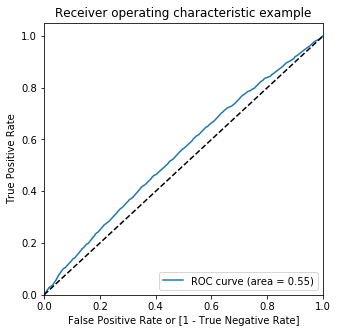

In [192]:
## using roc_cuve from the matrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Performance Tag"], y_train_pred_final.predicted, 
                                         drop_intermediate = False )
## draw ROC curve based on the probability values generated by the model
draw_roc(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"])

In [193]:
# Find optimal cutoff probablity, let's create columns with different probability cutoffs 
numbers=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Performance Tag,probability,Application ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,1,0.949542,27700,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
1,1,0.951468,8423,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
2,1,0.960118,4600,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
3,0,0.955021,55131,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
4,1,0.961619,24340,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0


In [194]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Performance Tag"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.90  0.90  0.958372  0.999936  0.000000
0.91  0.91  0.957717  0.999231  0.000492
0.92  0.92  0.957082  0.998548  0.000985
0.93  0.93  0.956591  0.997971  0.002462
0.94  0.94  0.956571  0.997886  0.003939
0.95  0.95  0.824891  0.852851  0.180207
0.96  0.96  0.471849  0.466453  0.596258
0.97  0.97  0.041567  0.000000  1.000000
0.98  0.98  0.041567  0.000000  1.000000
0.99  0.99  0.041567  0.000000  1.000000


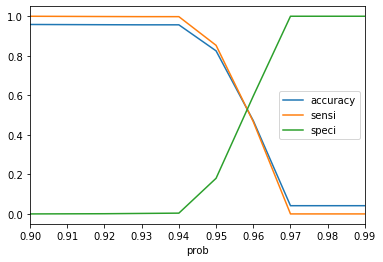

In [195]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [196]:
# making prediction after cut off point equal to 0.955 on train data set

y_train_pred_final['final_predicted'] = y_train_pred_final.probability.map( lambda x: 1 if x > 0.955 else 0)
y_train_pred_final.head()

,Performance Tag,probability,Application ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,final_predicted
0,1,0.949542,27700,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
1,1,0.951468,8423,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
2,1,0.960118,4600,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.955021,55131,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.961619,24340,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1


In [197]:
classification_metrics(y_train_pred_final["Performance Tag"], y_train_pred_final["final_predicted"] )

print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[  683  1348]
 [12858 33972]]

Accuracy:0.709
Recall/Sensitivity: 0.7254324151185138
Precision: 0.9618346545866364
Specificity:0.336
AUC: 0.545857740154658


In [198]:
#Accuracy,Sensitivity and Precision looks good for this model while specificity is low

##### Predicting on test data

In [199]:
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

32218    0.962619
42975    0.961619
53879    0.961619
19759    0.952719
50887    0.964123
35308    0.964534
36585    0.962161
44381    0.961619
33553    0.949865
61466    0.949203
dtype: float64

In [200]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.96261876, 0.96161867, 0.96161867, 0.95271945, 0.96412293,
       0.96453394, 0.96216054, 0.96161867, 0.94986499, 0.94920289])

In [201]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Performance Tag':y_test.values, 'probability':y_test_pred})
y_test_pred_final['Application ID'] = y_test.index
y_test_pred_final.head()

,Performance Tag,probability,Application ID
0,1,0.962619,32218
1,1,0.961619,42975
2,1,0.961619,53879
3,1,0.952719,19759
4,1,0.964123,50887


In [202]:
# Create new column 'predicted' with 1 if probability > 0.955 else 0
y_test_pred_final['predicted'] = y_test_pred_final.probability.map(lambda x: 1 if x > 0.955 else 0)

# Let's see the head
y_test_pred_final.head()

,Performance Tag,probability,Application ID,predicted
0,1,0.962619,32218,1
1,1,0.961619,42975,1
2,1,0.961619,53879,1
3,1,0.952719,19759,0
4,1,0.964123,50887,1


In [203]:
classification_metrics(y_test_pred_final["Performance Tag"], y_test_pred_final["predicted"] )

Confusion Metrics:
 [[  295   620]
 [ 5489 14537]]

Accuracy:0.708
Recall/Sensitivity: 0.7259063217816838
Precision: 0.95909480767962
Specificity:0.322


#### Accuracy,Sensitivity , Precision and specificity is is identical with that of train data set.

## Model building for woe transformed master dataset

In [204]:
#Logistic regression

In [205]:
master_woe.shape

(69802, 28)

In [206]:
master_woe.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_cb
0,-0.074055,0.032571,-0.003991,-0.084256,-0.275755,0.016496,-0.028106,-0.004372,0.034063,-0.203322,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.480781,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,-0.237377,-0.825972,-0.543019,0.011949,1
1,0.026641,-0.010274,-0.003991,-0.025561,-0.391110,-0.017650,-0.014173,-0.004372,0.034063,-0.084034,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.480781,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,0.071909,-0.186506,-0.543019,0.011949,1
2,0.026641,-0.010274,0.022792,-0.084256,-0.188844,0.016496,-0.014173,-0.004372,-0.128674,-0.084034,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.656231,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,-0.237377,-0.825972,-0.543019,0.011949,1
3,-0.021653,-0.010274,-0.003991,0.040706,-0.391110,0.016496,0.091560,-0.004372,0.051121,-0.203322,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.480781,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,-0.237377,0.341334,-0.543019,-0.137934,1
4,0.026641,0.032571,-0.003991,0.003949,-0.275755,-0.017650,-0.028106,-0.004372,0.034063,-0.084034,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.656231,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,-0.237377,-0.825972,-0.543019,0.011949,1


In [207]:
# feature variable on X
X = master_woe.drop(['Performance Tag_cb'],axis=1)

#response variable on y
y = master_woe['Performance Tag_cb']

In [208]:
X.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,-0.074055,0.032571,-0.003991,-0.084256,-0.275755,0.016496,-0.028106,-0.004372,0.034063,-0.203322,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.480781,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,-0.237377,-0.825972,-0.543019,0.011949
1,0.026641,-0.010274,-0.003991,-0.025561,-0.391110,-0.017650,-0.014173,-0.004372,0.034063,-0.084034,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.480781,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,0.071909,-0.186506,-0.543019,0.011949
2,0.026641,-0.010274,0.022792,-0.084256,-0.188844,0.016496,-0.014173,-0.004372,-0.128674,-0.084034,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.656231,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,-0.237377,-0.825972,-0.543019,0.011949
3,-0.021653,-0.010274,-0.003991,0.040706,-0.391110,0.016496,0.091560,-0.004372,0.051121,-0.203322,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.480781,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,-0.237377,0.341334,-0.543019,-0.137934
4,0.026641,0.032571,-0.003991,0.003949,-0.275755,-0.017650,-0.028106,-0.004372,0.034063,-0.084034,-0.260793,-0.336542,-0.387007,-0.356789,-0.35223,-0.376763,-0.657436,-0.656231,-0.675864,-0.649614,-0.894764,-0.71883,-0.498524,-0.237377,-0.825972,-0.543019,0.011949


In [209]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Performance Tag_cb, dtype: int64

In [210]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [211]:
X_train.shape

(48861, 27)

In [212]:
 X_test.shape

(20941, 27)

In [213]:
y_train.head()

27651    1
8378     1
4557     1
55076    0
24292    1
Name: Performance Tag_cb, dtype: int64

In [214]:
#checking class imbalance
(y_train.value_counts()/y_train.shape)*100

1    95.843311
0     4.156689
Name: Performance Tag_cb, dtype: float64

In [215]:
#dataset is highly imbalance

In [216]:
#creating a variable having column name
col1 = master_woe.drop("Performance Tag_cb",1).columns
col1

Index(['Age', 'Gender', 'Marital Status', 'No of dependents', 'Income', 'Education', 'Profession', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'No of times 90 DPD or worse in last 6 months', 'No of times 60 DPD or worse in last 6 months', 'No of times 30 DPD or worse in last 6 months', 'No of times 90 DPD or worse in last 12 months', 'No of times 60 DPD or worse in last 12 months', 'No of times 30 DPD or worse in last 12 months', 'Avgas CC Utilization in last 12 months', 'No of trades opened in last 6 months', 'No of trades opened in last 12 months', 'No of PL trades opened in last 6 months', 'No of PL trades opened in last 12 months', 'No of Inquiries in last 6 months (excluding home & auto loans)', 'No of Inquiries in last 12 months (excluding home & auto loans)', 'Presence of open home loan', 'Outstanding Balance', 'Total No of Trades', 'Presence of open auto loan'], dtype='object')

In [217]:
# creating default logistic regression model

logm_cb = sm.GLM(y_train,(sm.add_constant(X_train)), class_weight="balanced",family = sm.families.Binomial())
logm_cb.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48833
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8078.0
Date:                Mon, 13 Apr 2020   Deviance:                       16156.
Time:                        23:03:05   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1639      0.026    121.996      0.000       3.113       3.215
Age                                                                 0.0018      0.003      0.572      0.567      -0.004       0.008
Gender                                                             -1.2688      1.245     -1.019      0.308      -3.708       1.171
Marital Status                                                     -1.4699      2.352     -0.625      0.532      -6.079       3.139
No of dependents                                                   -0.7298      0.449     -1.624      0.104      -1.611       0.151
Income                                                             -0.0005      0.005     -0.098      0.922      -0.010       0.009
Education                                                          -0.8020      0.760     -1.056      0.291      -2.291       0.687
Profession                                                         -0.7498      0.480     -1.563      0.118      -1.690       0.190
Type of residence                                                  -0.9044      0.796     -1.136      0.256      -2.465       0.656
No of months in current residence                                  -0.0021      0.003     -0.698      0.485      -0.008       0.004
No of months in current company                                    -0.3568      0.169     -2.108      0.035      -0.689      -0.025
No of times 90 DPD or worse in last 6 months                        0.1998      0.125      1.592      0.111      -0.046       0.446
No of times 60 DPD or worse in last 6 months                       -0.0988      0.180     -0.548      0.584      -0.452       0.255
No of times 30 DPD or worse in last 6 months                       -0.3799      0.177     -2.144      0.032      -0.727      -0.033
No of times 90 DPD or worse in last 12 months                      -0.2335      0.106     -2.195      0.028      -0.442      -0.025
No of times 60 DPD or worse in last 12 months                       0.0573      0.137      0.419      0.676      -0.211       0.326
No of times 30 DPD or worse in last 12 months                      -0.1936      0.139     -1.394      0.163      -0.466       0.079
Avgas CC Utilization in last 12 months                             -0.0006      0.001     -0.642      0.521      -0.003       0.001
No of trades opened in last 6 months                               -0.0777      0.107     -0.728      0.467      -0.287       0.132
No of trades opened in last 12 months                               0.1720      0.113      1.519      0.129      -0.050       0.394
No of PL trades opened in last 6 months        

In [218]:
# p-value of the feauture presence of home loan is high, lets drop it and re create the model
col1 = col1.drop('Income', 1)

X_train_sm = sm.add_constant(X_train[col1])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48834
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8078.0
Date:                Mon, 13 Apr 2020   Deviance:                       16156.
Time:                        23:03:07   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1635      0.026    123.052      0.000       3.113       3.214
Age                                                                 0.0018      0.003      0.573      0.567      -0.004       0.008
Gender                                                             -1.2686      1.245     -1.019      0.308      -3.708       1.171
Marital Status                                                     -1.4680      2.351     -0.624      0.532      -6.077       3.141
No of dependents                                                   -0.7299      0.449     -1.624      0.104      -1.611       0.151
Education                                                          -0.8013      0.760     -1.055      0.292      -2.290       0.688
Profession                                                         -0.7499      0.480     -1.563      0.118      -1.690       0.190
Type of residence                                                  -0.9047      0.796     -1.137      0.256      -2.465       0.655
No of months in current residence                                  -0.0021      0.003     -0.697      0.486      -0.008       0.004
No of months in current company                                    -0.3568      0.169     -2.108      0.035      -0.689      -0.025
No of times 90 DPD or worse in last 6 months                        0.1998      0.125      1.592      0.111      -0.046       0.446
No of times 60 DPD or worse in last 6 months                       -0.0988      0.180     -0.548      0.584      -0.452       0.254
No of times 30 DPD or worse in last 6 months                       -0.3798      0.177     -2.144      0.032      -0.727      -0.033
No of times 90 DPD or worse in last 12 months                      -0.2335      0.106     -2.195      0.028      -0.442      -0.025
No of times 60 DPD or worse in last 12 months                       0.0574      0.137      0.419      0.675      -0.211       0.326
No of times 30 DPD or worse in last 12 months                      -0.1938      0.139     -1.395      0.163      -0.466       0.078
Avgas CC Utilization in last 12 months                             -0.0006      0.001     -0.642      0.521      -0.003       0.001
No of trades opened in last 6 months                               -0.0777      0.107     -0.727      0.467      -0.287       0.132
No of trades opened in last 12 months                               0.1720      0.113      1.519      0.129      -0.050       0.394
No of PL trades opened in last 6 months                             0.0115      0.111      0.104      0.917      -0.205       0.228
No of PL trades opened in last 12 months       

In [219]:
#checking vif 

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,No of times 30 DPD or worse in last 6 months,18.47
10,No of times 60 DPD or worse in last 6 months,18.42
14,No of times 30 DPD or worse in last 12 months,9.45
19,No of PL trades opened in last 12 months,8.25
9,No of times 90 DPD or worse in last 6 months,7.43
13,No of times 60 DPD or worse in last 12 months,7.24
18,No of PL trades opened in last 6 months,6.52
12,No of times 90 DPD or worse in last 12 months,5.84
17,No of trades opened in last 12 months,4.39
16,No of trades opened in last 6 months,4.32


In [220]:
# 'No of times 60 DPD or worse in last 6 months' has high vif as well as high p value, deleteing this column

col1 = col1.drop('No of times 60 DPD or worse in last 6 months',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48835
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8078.2
Date:                Mon, 13 Apr 2020   Deviance:                       16156.
Time:                        23:03:15   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1635      0.026    123.053      0.000       3.113       3.214
Age                                                                 0.0018      0.003      0.574      0.566      -0.004       0.008
Gender                                                             -1.2708      1.245     -1.021      0.307      -3.710       1.169
Marital Status                                                     -1.4697      2.351     -0.625      0.532      -6.078       3.139
No of dependents                                                   -0.7304      0.449     -1.625      0.104      -1.611       0.150
Education                                                          -0.8020      0.760     -1.055      0.291      -2.292       0.687
Profession                                                         -0.7463      0.480     -1.556      0.120      -1.686       0.194
Type of residence                                                  -0.9018      0.796     -1.133      0.257      -2.462       0.658
No of months in current residence                                  -0.0021      0.003     -0.699      0.485      -0.008       0.004
No of months in current company                                    -0.3564      0.169     -2.105      0.035      -0.688      -0.025
No of times 90 DPD or worse in last 6 months                        0.1700      0.114      1.495      0.135      -0.053       0.393
No of times 30 DPD or worse in last 6 months                       -0.4323      0.148     -2.922      0.003      -0.722      -0.142
No of times 90 DPD or worse in last 12 months                      -0.2315      0.106     -2.179      0.029      -0.440      -0.023
No of times 60 DPD or worse in last 12 months                       0.0244      0.123      0.199      0.842      -0.216       0.265
No of times 30 DPD or worse in last 12 months                      -0.1825      0.137     -1.329      0.184      -0.452       0.087
Avgas CC Utilization in last 12 months                             -0.0006      0.001     -0.659      0.510      -0.003       0.001
No of trades opened in last 6 months                               -0.0774      0.107     -0.725      0.469      -0.287       0.132
No of trades opened in last 12 months                               0.1731      0.113      1.529      0.126      -0.049       0.395
No of PL trades opened in last 6 months                             0.0105      0.111      0.095      0.924      -0.206       0.227
No of PL trades opened in last 12 months                           -0.3864      0.115     -3.366      0.001      -0.611      -0.161
No of Inquiries in last 6 months (excluding hom

In [221]:
# 'Total No of Trades' has high p value, deleteing this column
col1 = col1.drop('Total No of Trades',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48836
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8078.2
Date:                Mon, 13 Apr 2020   Deviance:                       16156.
Time:                        23:03:16   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1635      0.026    123.055      0.000       3.113       3.214
Age                                                                 0.0018      0.003      0.574      0.566      -0.004       0.008
Gender                                                             -1.2721      1.245     -1.022      0.307      -3.711       1.167
Marital Status                                                     -1.4678      2.351     -0.624      0.532      -6.077       3.141
No of dependents                                                   -0.7303      0.449     -1.625      0.104      -1.611       0.150
Education                                                          -0.8017      0.760     -1.055      0.291      -2.291       0.688
Profession                                                         -0.7464      0.480     -1.556      0.120      -1.686       0.194
Type of residence                                                  -0.9021      0.796     -1.133      0.257      -2.463       0.658
No of months in current residence                                  -0.0021      0.003     -0.698      0.485      -0.008       0.004
No of months in current company                                    -0.3566      0.169     -2.106      0.035      -0.688      -0.025
No of times 90 DPD or worse in last 6 months                        0.1689      0.114      1.488      0.137      -0.054       0.391
No of times 30 DPD or worse in last 6 months                       -0.4315      0.148     -2.918      0.004      -0.721      -0.142
No of times 90 DPD or worse in last 12 months                      -0.2308      0.106     -2.174      0.030      -0.439      -0.023
No of times 60 DPD or worse in last 12 months                       0.0247      0.123      0.202      0.840      -0.215       0.265
No of times 30 DPD or worse in last 12 months                      -0.1820      0.137     -1.326      0.185      -0.451       0.087
Avgas CC Utilization in last 12 months                             -0.0007      0.001     -0.671      0.502      -0.003       0.001
No of trades opened in last 6 months                               -0.0739      0.105     -0.705      0.481      -0.279       0.132
No of trades opened in last 12 months                               0.1781      0.109      1.628      0.104      -0.036       0.393
No of PL trades opened in last 6 months                             0.0112      0.111      0.101      0.920      -0.206       0.228
No of PL trades opened in last 12 months                           -0.3864      0.115     -3.365      0.001      -0.611      -0.161
No of Inquiries in last 6 months (excluding hom

In [222]:
## 'Presence of open auto loan' has high p value, deleteing this column

col1 = col1.drop('Presence of open auto loan',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48837
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8078.2
Date:                Mon, 13 Apr 2020   Deviance:                       16156.
Time:                        23:03:16   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1634      0.026    123.060      0.000       3.113       3.214
Age                                                                 0.0018      0.003      0.572      0.567      -0.004       0.008
Gender                                                             -1.2722      1.245     -1.022      0.307      -3.712       1.167
Marital Status                                                     -1.4681      2.351     -0.624      0.532      -6.077       3.141
No of dependents                                                   -0.7296      0.449     -1.624      0.104      -1.610       0.151
Education                                                          -0.8006      0.760     -1.053      0.292      -2.290       0.689
Profession                                                         -0.7463      0.480     -1.556      0.120      -1.686       0.194
Type of residence                                                  -0.9015      0.796     -1.132      0.257      -2.462       0.659
No of months in current residence                                  -0.0021      0.003     -0.696      0.486      -0.008       0.004
No of months in current company                                    -0.3563      0.169     -2.105      0.035      -0.688      -0.025
No of times 90 DPD or worse in last 6 months                        0.1689      0.114      1.488      0.137      -0.054       0.391
No of times 30 DPD or worse in last 6 months                       -0.4315      0.148     -2.918      0.004      -0.721      -0.142
No of times 90 DPD or worse in last 12 months                      -0.2307      0.106     -2.173      0.030      -0.439      -0.023
No of times 60 DPD or worse in last 12 months                       0.0246      0.123      0.201      0.841      -0.216       0.265
No of times 30 DPD or worse in last 12 months                      -0.1821      0.137     -1.326      0.185      -0.451       0.087
Avgas CC Utilization in last 12 months                             -0.0007      0.001     -0.671      0.502      -0.003       0.001
No of trades opened in last 6 months                               -0.0736      0.105     -0.702      0.482      -0.279       0.132
No of trades opened in last 12 months                               0.1782      0.109      1.628      0.103      -0.036       0.393
No of PL trades opened in last 6 months                             0.0114      0.111      0.103      0.918      -0.205       0.228
No of PL trades opened in last 12 months                           -0.3852      0.115     -3.359      0.001      -0.610      -0.160
No of Inquiries in last 6 months (excluding hom

In [223]:
## 'Presence of open home  loan' has high p value, deleteing this column

col1 = col1.drop('Presence of open home loan',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48838
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8078.2
Date:                Mon, 13 Apr 2020   Deviance:                       16156.
Time:                        23:03:17   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1635      0.026    123.065      0.000       3.113       3.214
Age                                                                 0.0018      0.003      0.571      0.568      -0.004       0.008
Gender                                                             -1.2719      1.245     -1.022      0.307      -3.711       1.168
Marital Status                                                     -1.4672      2.351     -0.624      0.533      -6.076       3.142
No of dependents                                                   -0.7304      0.449     -1.625      0.104      -1.611       0.150
Education                                                          -0.8014      0.760     -1.054      0.292      -2.291       0.688
Profession                                                         -0.7465      0.480     -1.557      0.120      -1.686       0.193
Type of residence                                                  -0.9006      0.796     -1.131      0.258      -2.461       0.660
No of months in current residence                                  -0.0021      0.003     -0.697      0.486      -0.008       0.004
No of months in current company                                    -0.3567      0.169     -2.107      0.035      -0.688      -0.025
No of times 90 DPD or worse in last 6 months                        0.1690      0.114      1.489      0.137      -0.054       0.392
No of times 30 DPD or worse in last 6 months                       -0.4319      0.148     -2.921      0.003      -0.722      -0.142
No of times 90 DPD or worse in last 12 months                      -0.2309      0.106     -2.175      0.030      -0.439      -0.023
No of times 60 DPD or worse in last 12 months                       0.0246      0.123      0.201      0.841      -0.216       0.265
No of times 30 DPD or worse in last 12 months                      -0.1822      0.137     -1.328      0.184      -0.451       0.087
Avgas CC Utilization in last 12 months                             -0.0007      0.001     -0.676      0.499      -0.003       0.001
No of trades opened in last 6 months                               -0.0734      0.105     -0.701      0.483      -0.279       0.132
No of trades opened in last 12 months                               0.1783      0.109      1.629      0.103      -0.036       0.393
No of PL trades opened in last 6 months                             0.0124      0.111      0.112      0.911      -0.204       0.229
No of PL trades opened in last 12 months                           -0.3842      0.115     -3.351      0.001      -0.609      -0.159
No of Inquiries in last 6 months (excluding hom

In [224]:
## 'No of times 60 DPD or worse in last 12 months' has high p value, deleteing this column

col1 = col1.drop('No of times 60 DPD or worse in last 12 months',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48839
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8078.3
Date:                Mon, 13 Apr 2020   Deviance:                       16157.
Time:                        23:03:18   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1635      0.026    123.065      0.000       3.113       3.214
Age                                                                 0.0018      0.003      0.570      0.569      -0.004       0.008
Gender                                                             -1.2705      1.245     -1.021      0.307      -3.710       1.169
Marital Status                                                     -1.4673      2.351     -0.624      0.533      -6.076       3.141
No of dependents                                                   -0.7307      0.449     -1.626      0.104      -1.612       0.150
Education                                                          -0.8007      0.760     -1.053      0.292      -2.290       0.689
Profession                                                         -0.7466      0.480     -1.557      0.120      -1.687       0.193
Type of residence                                                  -0.9002      0.796     -1.131      0.258      -2.460       0.660
No of months in current residence                                  -0.0021      0.003     -0.697      0.486      -0.008       0.004
No of months in current company                                    -0.3562      0.169     -2.105      0.035      -0.688      -0.024
No of times 90 DPD or worse in last 6 months                        0.1737      0.111      1.564      0.118      -0.044       0.391
No of times 30 DPD or worse in last 6 months                       -0.4255      0.144     -2.946      0.003      -0.709      -0.142
No of times 90 DPD or worse in last 12 months                      -0.2291      0.106     -2.166      0.030      -0.437      -0.022
No of times 30 DPD or worse in last 12 months                      -0.1727      0.129     -1.341      0.180      -0.425       0.080
Avgas CC Utilization in last 12 months                             -0.0007      0.001     -0.680      0.496      -0.003       0.001
No of trades opened in last 6 months                               -0.0737      0.105     -0.703      0.482      -0.279       0.132
No of trades opened in last 12 months                               0.1790      0.109      1.636      0.102      -0.035       0.393
No of PL trades opened in last 6 months                             0.0125      0.111      0.113      0.910      -0.204       0.229
No of PL trades opened in last 12 months                           -0.3849      0.115     -3.358      0.001      -0.610      -0.160
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2417      0.075     -3.226      0.001      -0.388      -0.095
No of Inquiries in last 12 months (excluding ho

In [225]:
## 'Age' has high p value, deleteing this column

col1 = col1.drop('Age',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48840
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8078.4
Date:                Mon, 13 Apr 2020   Deviance:                       16157.
Time:                        23:03:18   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1650      0.026    123.729      0.000       3.115       3.215
Gender                                                             -1.2687      1.245     -1.019      0.308      -3.708       1.171
Marital Status                                                     -1.4952      2.351     -0.636      0.525      -6.103       3.113
No of dependents                                                   -0.7305      0.449     -1.625      0.104      -1.611       0.150
Education                                                          -0.8045      0.760     -1.059      0.290      -2.294       0.685
Profession                                                         -0.7455      0.480     -1.554      0.120      -1.685       0.194
Type of residence                                                  -0.9050      0.796     -1.137      0.256      -2.466       0.656
No of months in current residence                                  -0.0020      0.003     -0.690      0.490      -0.008       0.004
No of months in current company                                    -0.3568      0.169     -2.108      0.035      -0.688      -0.025
No of times 90 DPD or worse in last 6 months                        0.1739      0.111      1.566      0.117      -0.044       0.392
No of times 30 DPD or worse in last 6 months                       -0.4254      0.144     -2.946      0.003      -0.709      -0.142
No of times 90 DPD or worse in last 12 months                      -0.2291      0.106     -2.166      0.030      -0.436      -0.022
No of times 30 DPD or worse in last 12 months                      -0.1732      0.129     -1.345      0.179      -0.426       0.079
Avgas CC Utilization in last 12 months                             -0.0007      0.001     -0.676      0.499      -0.003       0.001
No of trades opened in last 6 months                               -0.0729      0.105     -0.696      0.487      -0.278       0.132
No of trades opened in last 12 months                               0.1785      0.109      1.632      0.103      -0.036       0.393
No of PL trades opened in last 6 months                             0.0127      0.111      0.115      0.908      -0.204       0.229
No of PL trades opened in last 12 months                           -0.3847      0.115     -3.358      0.001      -0.609      -0.160
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2418      0.075     -3.229      0.001      -0.389      -0.095
No of Inquiries in last 12 months (excluding home & auto loans)    -0.1953      0.060     -3.267      0.001      -0.313      -0.078
Outstanding Balance                            

In [226]:
## 'No of PL trades opened in last 6 months' has high p value, deleteing this column

col1 = col1.drop('No of PL trades opened in last 6 months',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48841
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8078.4
Date:                Mon, 13 Apr 2020   Deviance:                       16157.
Time:                        23:03:19   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1650      0.026    123.729      0.000       3.115       3.215
Gender                                                             -1.2685      1.245     -1.019      0.308      -3.708       1.171
Marital Status                                                     -1.4922      2.351     -0.635      0.526      -6.100       3.115
No of dependents                                                   -0.7306      0.449     -1.626      0.104      -1.611       0.150
Education                                                          -0.8048      0.760     -1.059      0.290      -2.294       0.685
Profession                                                         -0.7455      0.480     -1.555      0.120      -1.685       0.194
Type of residence                                                  -0.9050      0.796     -1.137      0.256      -2.466       0.656
No of months in current residence                                  -0.0020      0.003     -0.690      0.490      -0.008       0.004
No of months in current company                                    -0.3567      0.169     -2.108      0.035      -0.688      -0.025
No of times 90 DPD or worse in last 6 months                        0.1740      0.111      1.567      0.117      -0.044       0.392
No of times 30 DPD or worse in last 6 months                       -0.4257      0.144     -2.948      0.003      -0.709      -0.143
No of times 90 DPD or worse in last 12 months                      -0.2292      0.106     -2.167      0.030      -0.437      -0.022
No of times 30 DPD or worse in last 12 months                      -0.1734      0.129     -1.347      0.178      -0.426       0.079
Avgas CC Utilization in last 12 months                             -0.0007      0.001     -0.671      0.502      -0.003       0.001
No of trades opened in last 6 months                               -0.0674      0.093     -0.723      0.470      -0.250       0.115
No of trades opened in last 12 months                               0.1786      0.109      1.633      0.102      -0.036       0.393
No of PL trades opened in last 12 months                           -0.3787      0.102     -3.709      0.000      -0.579      -0.179
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2421      0.075     -3.233      0.001      -0.389      -0.095
No of Inquiries in last 12 months (excluding home & auto loans)    -0.1956      0.060     -3.271      0.001      -0.313      -0.078
Outstanding Balance                                                -0.2246      0.080     -2.801      0.005      -0.382      -0.067
===============================================

In [227]:
## 'Marital Status' has high p value, deleteing this column

col1 = col1.drop('Marital Status',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48842
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8078.6
Date:                Mon, 13 Apr 2020   Deviance:                       16157.
Time:                        23:03:20   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1649      0.026    123.740      0.000       3.115       3.215
Gender                                                             -1.2771      1.244     -1.026      0.305      -3.716       1.162
No of dependents                                                   -0.7349      0.449     -1.635      0.102      -1.616       0.146
Education                                                          -0.8027      0.760     -1.056      0.291      -2.292       0.687
Profession                                                         -0.7455      0.480     -1.554      0.120      -1.685       0.194
Type of residence                                                  -0.9311      0.798     -1.167      0.243      -2.495       0.633
No of months in current residence                                  -0.0020      0.003     -0.687      0.492      -0.008       0.004
No of months in current company                                    -0.3556      0.169     -2.101      0.036      -0.687      -0.024
No of times 90 DPD or worse in last 6 months                        0.1740      0.111      1.566      0.117      -0.044       0.392
No of times 30 DPD or worse in last 6 months                       -0.4261      0.144     -2.951      0.003      -0.709      -0.143
No of times 90 DPD or worse in last 12 months                      -0.2291      0.106     -2.166      0.030      -0.436      -0.022
No of times 30 DPD or worse in last 12 months                      -0.1736      0.129     -1.348      0.178      -0.426       0.079
Avgas CC Utilization in last 12 months                             -0.0007      0.001     -0.670      0.503      -0.003       0.001
No of trades opened in last 6 months                               -0.0673      0.093     -0.722      0.470      -0.250       0.115
No of trades opened in last 12 months                               0.1789      0.109      1.636      0.102      -0.035       0.393
No of PL trades opened in last 12 months                           -0.3794      0.102     -3.716      0.000      -0.580      -0.179
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2419      0.075     -3.231      0.001      -0.389      -0.095
No of Inquiries in last 12 months (excluding home & auto loans)    -0.1958      0.060     -3.278      0.001      -0.313      -0.079
Outstanding Balance                                                -0.2245      0.080     -2.799      0.005      -0.382      -0.067
===================================================================================================================================
"""

In [228]:
## 'No of months in current residence' has high p value, deleteing this column

col1 = col1.drop('No of months in current residence',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48843
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8078.9
Date:                Mon, 13 Apr 2020   Deviance:                       16158.
Time:                        23:03:20   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1642      0.026    123.838      0.000       3.114       3.214
Gender                                                             -1.2734      1.244     -1.023      0.306      -3.712       1.166
No of dependents                                                   -0.7346      0.449     -1.634      0.102      -1.616       0.146
Education                                                          -0.8001      0.760     -1.053      0.293      -2.290       0.690
Profession                                                         -0.7435      0.480     -1.550      0.121      -1.683       0.196
Type of residence                                                  -0.9311      0.798     -1.167      0.243      -2.495       0.632
No of months in current company                                    -0.3561      0.169     -2.104      0.035      -0.688      -0.024
No of times 90 DPD or worse in last 6 months                        0.1739      0.111      1.566      0.117      -0.044       0.392
No of times 30 DPD or worse in last 6 months                       -0.4250      0.144     -2.943      0.003      -0.708      -0.142
No of times 90 DPD or worse in last 12 months                      -0.2295      0.106     -2.170      0.030      -0.437      -0.022
No of times 30 DPD or worse in last 12 months                      -0.1750      0.129     -1.359      0.174      -0.427       0.077
Avgas CC Utilization in last 12 months                             -0.0007      0.001     -0.678      0.498      -0.003       0.001
No of trades opened in last 6 months                               -0.0673      0.093     -0.722      0.470      -0.250       0.115
No of trades opened in last 12 months                               0.1793      0.109      1.639      0.101      -0.035       0.394
No of PL trades opened in last 12 months                           -0.3804      0.102     -3.726      0.000      -0.580      -0.180
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2420      0.075     -3.233      0.001      -0.389      -0.095
No of Inquiries in last 12 months (excluding home & auto loans)    -0.1957      0.060     -3.277      0.001      -0.313      -0.079
Outstanding Balance                                                -0.2246      0.080     -2.801      0.005      -0.382      -0.067
===================================================================================================================================
"""

In [229]:
## 'Avgas CC Utilization in last 12 months' has high p value, deleteing this column

col1 = col1.drop('Avgas CC Utilization in last 12 months',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48844
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8079.1
Date:                Mon, 13 Apr 2020   Deviance:                       16158.
Time:                        23:03:21   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1604      0.025    126.892      0.000       3.112       3.209
Gender                                                             -1.2695      1.244     -1.020      0.308      -3.709       1.170
No of dependents                                                   -0.7369      0.449     -1.639      0.101      -1.618       0.144
Education                                                          -0.7981      0.760     -1.050      0.294      -2.288       0.692
Profession                                                         -0.7432      0.480     -1.550      0.121      -1.683       0.197
Type of residence                                                  -0.9328      0.798     -1.169      0.242      -2.496       0.631
No of months in current company                                    -0.3549      0.169     -2.097      0.036      -0.686      -0.023
No of times 90 DPD or worse in last 6 months                        0.1700      0.111      1.533      0.125      -0.047       0.387
No of times 30 DPD or worse in last 6 months                       -0.4245      0.144     -2.938      0.003      -0.708      -0.141
No of times 90 DPD or worse in last 12 months                      -0.2311      0.106     -2.184      0.029      -0.439      -0.024
No of times 30 DPD or worse in last 12 months                      -0.1672      0.128     -1.303      0.193      -0.419       0.084
No of trades opened in last 6 months                               -0.0623      0.093     -0.671      0.502      -0.244       0.120
No of trades opened in last 12 months                               0.1811      0.109      1.655      0.098      -0.033       0.396
No of PL trades opened in last 12 months                           -0.3917      0.101     -3.888      0.000      -0.589      -0.194
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2401      0.075     -3.209      0.001      -0.387      -0.093
No of Inquiries in last 12 months (excluding home & auto loans)    -0.1952      0.060     -3.268      0.001      -0.312      -0.078
Outstanding Balance                                                -0.2215      0.080     -2.767      0.006      -0.378      -0.065
===================================================================================================================================
"""

In [230]:
## 'Gender' has high p value, deleteing this column

col1 = col1.drop('Gender',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48845
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8079.6
Date:                Mon, 13 Apr 2020   Deviance:                       16159.
Time:                        23:03:21   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1604      0.025    126.898      0.000       3.112       3.209
No of dependents                                                   -0.7341      0.449     -1.633      0.102      -1.615       0.147
Education                                                          -0.7920      0.760     -1.042      0.298      -2.282       0.698
Profession                                                         -0.7472      0.480     -1.558      0.119      -1.687       0.193
Type of residence                                                  -0.9360      0.798     -1.173      0.241      -2.499       0.627
No of months in current company                                    -0.3563      0.169     -2.106      0.035      -0.688      -0.025
No of times 90 DPD or worse in last 6 months                        0.1712      0.111      1.543      0.123      -0.046       0.389
No of times 30 DPD or worse in last 6 months                       -0.4248      0.144     -2.941      0.003      -0.708      -0.142
No of times 90 DPD or worse in last 12 months                      -0.2309      0.106     -2.182      0.029      -0.438      -0.023
No of times 30 DPD or worse in last 12 months                      -0.1676      0.128     -1.306      0.191      -0.419       0.084
No of trades opened in last 6 months                               -0.0634      0.093     -0.682      0.495      -0.246       0.119
No of trades opened in last 12 months                               0.1814      0.109      1.657      0.097      -0.033       0.396
No of PL trades opened in last 12 months                           -0.3911      0.101     -3.884      0.000      -0.589      -0.194
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2402      0.075     -3.211      0.001      -0.387      -0.094
No of Inquiries in last 12 months (excluding home & auto loans)    -0.1947      0.060     -3.260      0.001      -0.312      -0.078
Outstanding Balance                                                -0.2218      0.080     -2.771      0.006      -0.379      -0.065
===================================================================================================================================
"""

In [231]:
## 'Education' has high p value, deleteing this column

col1 = col1.drop('Education',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48846
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8080.1
Date:                Mon, 13 Apr 2020   Deviance:                       16160.
Time:                        23:03:21   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1603      0.025    126.904      0.000       3.112       3.209
No of dependents                                                   -0.7333      0.449     -1.632      0.103      -1.614       0.148
Profession                                                         -0.7453      0.480     -1.554      0.120      -1.685       0.195
Type of residence                                                  -0.9416      0.798     -1.179      0.238      -2.506       0.623
No of months in current company                                    -0.3556      0.169     -2.103      0.036      -0.687      -0.024
No of times 90 DPD or worse in last 6 months                        0.1715      0.111      1.546      0.122      -0.046       0.389
No of times 30 DPD or worse in last 6 months                       -0.4251      0.144     -2.942      0.003      -0.708      -0.142
No of times 90 DPD or worse in last 12 months                      -0.2313      0.106     -2.186      0.029      -0.439      -0.024
No of times 30 DPD or worse in last 12 months                      -0.1680      0.128     -1.310      0.190      -0.419       0.083
No of trades opened in last 6 months                               -0.0630      0.093     -0.677      0.498      -0.245       0.119
No of trades opened in last 12 months                               0.1813      0.109      1.656      0.098      -0.033       0.396
No of PL trades opened in last 12 months                           -0.3911      0.101     -3.883      0.000      -0.588      -0.194
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2407      0.075     -3.217      0.001      -0.387      -0.094
No of Inquiries in last 12 months (excluding home & auto loans)    -0.1939      0.060     -3.246      0.001      -0.311      -0.077
Outstanding Balance                                                -0.2218      0.080     -2.771      0.006      -0.379      -0.065
===================================================================================================================================
"""

In [232]:
## 'No of trades opened in last 6 months' has high p value, deleteing this column

col1 = col1.drop('No of trades opened in last 6 months',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48847
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8080.3
Date:                Mon, 13 Apr 2020   Deviance:                       16161.
Time:                        23:03:22   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1604      0.025    126.906      0.000       3.112       3.209
No of dependents                                                   -0.7352      0.449     -1.636      0.102      -1.616       0.146
Profession                                                         -0.7449      0.480     -1.553      0.120      -1.685       0.195
Type of residence                                                  -0.9470      0.799     -1.186      0.236      -2.512       0.618
No of months in current company                                    -0.3552      0.169     -2.100      0.036      -0.687      -0.024
No of times 90 DPD or worse in last 6 months                        0.1712      0.111      1.544      0.123      -0.046       0.389
No of times 30 DPD or worse in last 6 months                       -0.4237      0.144     -2.934      0.003      -0.707      -0.141
No of times 90 DPD or worse in last 12 months                      -0.2303      0.106     -2.177      0.029      -0.438      -0.023
No of times 30 DPD or worse in last 12 months                      -0.1697      0.128     -1.324      0.186      -0.421       0.082
No of trades opened in last 12 months                               0.1425      0.093      1.533      0.125      -0.040       0.325
No of PL trades opened in last 12 months                           -0.3918      0.101     -3.895      0.000      -0.589      -0.195
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2446      0.075     -3.276      0.001      -0.391      -0.098
No of Inquiries in last 12 months (excluding home & auto loans)    -0.1955      0.060     -3.270      0.001      -0.313      -0.078
Outstanding Balance                                                -0.2283      0.079     -2.872      0.004      -0.384      -0.073
===================================================================================================================================
"""

In [233]:
## 'Type of residence' has high p value, deleteing this column

col1 = col1.drop('Type of residence',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48848
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8081.1
Date:                Mon, 13 Apr 2020   Deviance:                       16162.
Time:                        23:03:22   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1605      0.025    126.928      0.000       3.112       3.209
No of dependents                                                   -0.7364      0.450     -1.638      0.101      -1.618       0.145
Profession                                                         -0.7193      0.479     -1.501      0.133      -1.658       0.220
No of months in current company                                    -0.3558      0.169     -2.103      0.035      -0.687      -0.024
No of times 90 DPD or worse in last 6 months                        0.1713      0.111      1.544      0.123      -0.046       0.389
No of times 30 DPD or worse in last 6 months                       -0.4236      0.144     -2.933      0.003      -0.707      -0.141
No of times 90 DPD or worse in last 12 months                      -0.2312      0.106     -2.186      0.029      -0.438      -0.024
No of times 30 DPD or worse in last 12 months                      -0.1689      0.128     -1.317      0.188      -0.420       0.082
No of trades opened in last 12 months                               0.1414      0.093      1.521      0.128      -0.041       0.324
No of PL trades opened in last 12 months                           -0.3918      0.101     -3.895      0.000      -0.589      -0.195
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2437      0.075     -3.265      0.001      -0.390      -0.097
No of Inquiries in last 12 months (excluding home & auto loans)    -0.1965      0.060     -3.293      0.001      -0.313      -0.080
Outstanding Balance                                                -0.2278      0.079     -2.865      0.004      -0.384      -0.072
===================================================================================================================================
"""

In [234]:

## 'No of times 30 DPD or worse in last 12 months' has high p value, deleteing this column

col1 = col1.drop('No of times 30 DPD or worse in last 12 months',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48849
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8082.0
Date:                Mon, 13 Apr 2020   Deviance:                       16164.
Time:                        23:03:23   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1611      0.025    126.927      0.000       3.112       3.210
No of dependents                                                   -0.7473      0.450     -1.662      0.096      -1.628       0.134
Profession                                                         -0.7226      0.479     -1.508      0.131      -1.661       0.216
No of months in current company                                    -0.3614      0.169     -2.138      0.032      -0.693      -0.030
No of times 90 DPD or worse in last 6 months                        0.1786      0.111      1.616      0.106      -0.038       0.395
No of times 30 DPD or worse in last 6 months                       -0.5700      0.092     -6.186      0.000      -0.751      -0.389
No of times 90 DPD or worse in last 12 months                      -0.2424      0.105     -2.299      0.021      -0.449      -0.036
No of trades opened in last 12 months                               0.1327      0.092      1.434      0.151      -0.049       0.314
No of PL trades opened in last 12 months                           -0.3798      0.100     -3.797      0.000      -0.576      -0.184
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2435      0.075     -3.265      0.001      -0.390      -0.097
No of Inquiries in last 12 months (excluding home & auto loans)    -0.1974      0.060     -3.306      0.001      -0.314      -0.080
Outstanding Balance                                                -0.2308      0.079     -2.903      0.004      -0.387      -0.075
===================================================================================================================================
"""

In [235]:

## 'No of trades opened in last 12 months' has high p value, deleteing this column

col1 = col1.drop('No of trades opened in last 12 months',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48850
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8083.0
Date:                Mon, 13 Apr 2020   Deviance:                       16166.
Time:                        23:03:23   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1610      0.025    126.971      0.000       3.112       3.210
No of dependents                                                   -0.7501      0.450     -1.669      0.095      -1.631       0.131
Profession                                                         -0.7244      0.479     -1.512      0.131      -1.663       0.215
No of months in current company                                    -0.3593      0.169     -2.126      0.034      -0.691      -0.028
No of times 90 DPD or worse in last 6 months                        0.1682      0.110      1.524      0.127      -0.048       0.384
No of times 30 DPD or worse in last 6 months                       -0.5512      0.091     -6.051      0.000      -0.730      -0.373
No of times 90 DPD or worse in last 12 months                      -0.2342      0.105     -2.226      0.026      -0.440      -0.028
No of PL trades opened in last 12 months                           -0.2880      0.077     -3.738      0.000      -0.439      -0.137
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2438      0.075     -3.272      0.001      -0.390      -0.098
No of Inquiries in last 12 months (excluding home & auto loans)    -0.1975      0.060     -3.318      0.001      -0.314      -0.081
Outstanding Balance                                                -0.2205      0.079     -2.787      0.005      -0.376      -0.065
===================================================================================================================================
"""

In [236]:

## 'Profession' has high p value, deleteing this column

col1 = col1.drop('Profession',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48851
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8084.2
Date:                Mon, 13 Apr 2020   Deviance:                       16168.
Time:                        23:03:23   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1612      0.025    126.983      0.000       3.112       3.210
No of dependents                                                   -0.7477      0.450     -1.663      0.096      -1.629       0.133
No of months in current company                                    -0.3594      0.169     -2.126      0.034      -0.691      -0.028
No of times 90 DPD or worse in last 6 months                        0.1694      0.110      1.535      0.125      -0.047       0.386
No of times 30 DPD or worse in last 6 months                       -0.5520      0.091     -6.061      0.000      -0.731      -0.374
No of times 90 DPD or worse in last 12 months                      -0.2347      0.105     -2.233      0.026      -0.441      -0.029
No of PL trades opened in last 12 months                           -0.2888      0.077     -3.748      0.000      -0.440      -0.138
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2435      0.075     -3.266      0.001      -0.390      -0.097
No of Inquiries in last 12 months (excluding home & auto loans)    -0.1972      0.060     -3.310      0.001      -0.314      -0.080
Outstanding Balance                                                -0.2208      0.079     -2.791      0.005      -0.376      -0.066
===================================================================================================================================
"""

In [237]:

## 'No of times 90 DPD or worse in last 6 months, deleteing this column

col1 = col1.drop('No of times 90 DPD or worse in last 6 months',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48852
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8085.3
Date:                Mon, 13 Apr 2020   Deviance:                       16171.
Time:                        23:03:24   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1618      0.025    126.999      0.000       3.113       3.211
No of dependents                                                   -0.7541      0.449     -1.678      0.093      -1.635       0.127
No of months in current company                                    -0.3662      0.169     -2.166      0.030      -0.697      -0.035
No of times 30 DPD or worse in last 6 months                       -0.4999      0.086     -5.824      0.000      -0.668      -0.332
No of times 90 DPD or worse in last 12 months                      -0.1452      0.089     -1.627      0.104      -0.320       0.030
No of PL trades opened in last 12 months                           -0.2952      0.077     -3.837      0.000      -0.446      -0.144
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2460      0.075     -3.298      0.001      -0.392      -0.100
No of Inquiries in last 12 months (excluding home & auto loans)    -0.2000      0.060     -3.345      0.001      -0.317      -0.083
Outstanding Balance                                                -0.2215      0.079     -2.800      0.005      -0.377      -0.066
===================================================================================================================================
"""

In [238]:

## 'No of dependents' has high p value, deleteing this column

col1 = col1.drop('No of dependents',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48853
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8086.7
Date:                Mon, 13 Apr 2020   Deviance:                       16173.
Time:                        23:03:24   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1618      0.025    127.020      0.000       3.113       3.211
No of months in current company                                    -0.3642      0.169     -2.155      0.031      -0.695      -0.033
No of times 30 DPD or worse in last 6 months                       -0.5003      0.086     -5.829      0.000      -0.668      -0.332
No of times 90 DPD or worse in last 12 months                      -0.1467      0.089     -1.644      0.100      -0.322       0.028
No of PL trades opened in last 12 months                           -0.2942      0.077     -3.824      0.000      -0.445      -0.143
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2460      0.075     -3.297      0.001      -0.392      -0.100
No of Inquiries in last 12 months (excluding home & auto loans)    -0.2001      0.060     -3.346      0.001      -0.317      -0.083
Outstanding Balance                                                -0.2226      0.079     -2.814      0.005      -0.378      -0.068
===================================================================================================================================
"""

In [239]:

## 'No of times 90 DPD or worse in last 12 months' has high p value, deleteing this column

col1 = col1.drop('No of times 90 DPD or worse in last 12 months',1)
X_train_sm = sm.add_constant(X_train[col1])
logm_cb = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm_cb.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Performance Tag_cb   No. Observations:                48861
Model:                            GLM   Df Residuals:                    48854
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8088.1
Date:                Mon, 13 Apr 2020   Deviance:                       16176.
Time:                        23:03:24   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                               3.1617      0.025    127.026      0.000       3.113       3.210
No of months in current company                                    -0.3686      0.169     -2.184      0.029      -0.699      -0.038
No of times 30 DPD or worse in last 6 months                       -0.6121      0.052    -11.680      0.000      -0.715      -0.509
No of PL trades opened in last 12 months                           -0.3048      0.077     -3.974      0.000      -0.455      -0.154
No of Inquiries in last 6 months (excluding home & auto loans)     -0.2467      0.075     -3.304      0.001      -0.393      -0.100
No of Inquiries in last 12 months (excluding home & auto loans)    -0.2012      0.060     -3.356      0.001      -0.319      -0.084
Outstanding Balance                                                -0.2199      0.079     -2.779      0.005      -0.375      -0.065
===================================================================================================================================
"""

In [240]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,No of PL trades opened in last 12 months,3.35
3,No of Inquiries in last 6 months (excluding ho...,3.09
4,No of Inquiries in last 12 months (excluding h...,2.56
5,Outstanding Balance,1.94
1,No of times 30 DPD or worse in last 6 months,1.48
0,No of months in current company,1.03


In [241]:
# VIF and p values looks ok, now making prediction
y_train_pred = res.predict(X_train_sm)
y_train_pred[:15]

27651    0.975537
8378     0.980740
4557     0.984274
55076    0.919702
24292    0.977865
6611     0.982378
38698    0.956992
55719    0.953381
24333    0.969325
6241     0.985305
13733    0.985305
32768    0.943893
42879    0.964857
15062    0.984274
25417    0.977451
dtype: float64

In [242]:
#Reshaping 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9755368 , 0.98073988, 0.98427445, 0.91970248, 0.97786454,
       0.98237849, 0.95699172, 0.95338101, 0.96932499, 0.98530472])

In [243]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Performance Tag':y_train.values, 'probability':y_train_pred})
y_train_pred_final['Application ID'] = y_train.index
y_train_pred_final.head()

,Performance Tag,probability,Application ID
0,1,0.975537,27651
1,1,0.980740,8378
2,1,0.984274,4557
3,0,0.919702,55076
4,1,0.977865,24292


In [244]:
## making the predictions based on the probability with the cut-off value as 0.95
## this cut-off value will be tuned later

y_train_pred_final['predicted'] = y_train_pred_final["probability"].map(lambda x: 1 if x > 0.95 else 0)

# Let's see the head
y_train_pred_final.head()

,Performance Tag,probability,Application ID,predicted
0,1,0.975537,27651,1
1,1,0.980740,8378,1
2,1,0.984274,4557,1
3,0,0.919702,55076,0
4,1,0.977865,24292,1


In [245]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
classification_metrics(y_train_pred_final["Performance Tag"], y_train_pred_final["predicted"] )
print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[ 1047   984]
 [12816 34014]]

Accuracy:0.718
Recall/Sensitivity: 0.7263292761050608
Precision: 0.971884107663295
Specificity:0.516
AUC: 0.672691254801064


#### Model has good accuracy,sensitivity and prcision and relatively low specificity

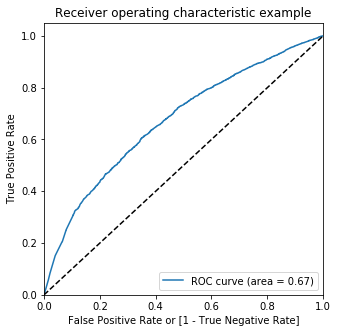

In [246]:
## using roc_cuve from the matrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Performance Tag"], y_train_pred_final.predicted, 
                                         drop_intermediate = False )
## draw ROC curve based on the probability values generated by the model
draw_roc(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"])

In [247]:
# Find optimal cutoff probablity, let's create columns with different probability cutoffs 
numbers = [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Performance Tag,probability,Application ID,predicted,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,1,0.975537,27651,1,1,1,1,1,1,1,1,1,0,0
1,1,0.980740,8378,1,1,1,1,1,1,1,1,1,1,0
2,1,0.984274,4557,1,1,1,1,1,1,1,1,1,1,0
3,0,0.919702,55076,0,1,1,0,0,0,0,0,0,0,0
4,1,0.977865,24292,1,1,1,1,1,1,1,1,1,0,0


In [248]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Performance Tag"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.90  0.90  0.949489  0.989451  0.028065
0.91  0.91  0.922310  0.957613  0.108321
0.92  0.92  0.866908  0.894405  0.232890
0.93  0.93  0.795645  0.813752  0.378139
0.94  0.94  0.750230  0.762673  0.463319
0.95  0.95  0.717566  0.726329  0.515510
0.96  0.96  0.604347  0.602264  0.652388
0.97  0.97  0.436974  0.420692  0.812408
0.98  0.98  0.332310  0.307880  0.895618
0.99  0.99  0.041567  0.000000  1.000000


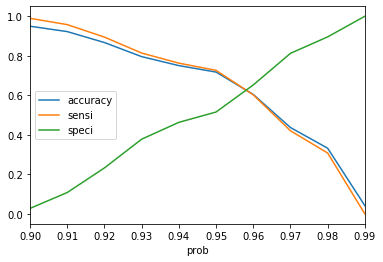

In [249]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [250]:
# let's make prediction using cut off point equal to 0.96 on train data set

y_train_pred_final['final_predicted'] = y_train_pred_final.probability.map( lambda x: 1 if x > 0.96 else 0)
y_train_pred_final.head()

,Performance Tag,probability,Application ID,predicted,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,final_predicted
0,1,0.975537,27651,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0.980740,8378,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.984274,4557,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.919702,55076,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.977865,24292,1,1,1,1,1,1,1,1,1,0,0,1


In [251]:
# lets check confusion metrics and other important metrics
classification_metrics(y_train_pred_final["Performance Tag"], y_train_pred_final["final_predicted"] )
print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[ 1325   706]
 [18626 28204]]

Accuracy:0.604
Recall/Sensitivity: 0.6022635062993807
Precision: 0.9755793842960914
Specificity:0.652
AUC: 0.672691254801064


#### Prediction on test dataset

In [252]:
## adding constant to the test dataset
X_test_sm = sm.add_constant(X_test[col1])

y_test_pred = res.predict(X_test_sm)
y_test_pred[:15]

32168    0.959244
42922    0.964055
53824    0.956370
19712    0.980740
50832    0.963541
35257    0.962246
36533    0.960463
44327    0.963719
33503    0.956019
61407    0.920308
46979    0.944789
64349    0.918477
53735    0.951672
11084    0.983124
44942    0.967462
dtype: float64

In [253]:
#Reshaping 
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:15]

array([0.95924374, 0.96405518, 0.95636981, 0.98073988, 0.96354085,
       0.96224609, 0.96046273, 0.96371864, 0.95601901, 0.92030754,
       0.94478855, 0.91847665, 0.95167181, 0.98312377, 0.9674616 ])

In [254]:
# Creating a dataframe with the actual performance tag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Performance Tag':y_test.values, 'probability':y_test_pred})
y_test_pred_final['Application ID'] = y_test.index
y_test_pred_final.head()

,Performance Tag,probability,Application ID
0,1,0.959244,32168
1,1,0.964055,42922
2,1,0.956370,53824
3,1,0.980740,19712
4,1,0.963541,50832


In [255]:
# Create new column 'predicted' with 1 if probability > 0.96 else 0
y_test_pred_final['predicted'] = y_test_pred_final.probability.map(lambda x: 1 if x > 0.96 else 0)

# Let's see the head
y_test_pred_final.head()

,Performance Tag,probability,Application ID,predicted
0,1,0.959244,32168,0
1,1,0.964055,42922,1
2,1,0.956370,53824,0
3,1,0.980740,19712,1
4,1,0.963541,50832,1


In [256]:
classification_metrics(y_test_pred_final["Performance Tag"], y_test_pred_final["predicted"] )

Confusion Metrics:
 [[  598   317]
 [ 7989 12037]]

Accuracy:0.603
Recall/Sensitivity: 0.6010686108059523
Precision: 0.9743402946414117
Specificity:0.654


#### All metrics are similar to that of train dataset, and this model is better than the model built on demo dataset as that had low specificity value

### Decision Tree model on master dataset

In [257]:
# Putting feature variable to X
X = master_woe.drop(['Performance Tag_cb'],axis=1)

# Putting response variable to y
y = master_woe['Performance Tag_cb']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [258]:
# Creating a decision tree with default hyper parameters.
dt_model = DecisionTreeClassifier(class_weight='balanced',max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [259]:
# Let's check the evaluation metrics of the model built above

# predictions on the training dataset
y_train_pred= dt_model.predict(X_train)

# Printing classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.07      0.65      0.13      2031
           1       0.98      0.63      0.77     46830

    accuracy                           0.63     48861
   macro avg       0.52      0.64      0.45     48861
weighted avg       0.94      0.63      0.74     48861



In [260]:
#Metrics
classification_metrics(y_train, y_train_pred)

Confusion Metrics:
 [[ 1316   715]
 [17178 29652]]

Accuracy:0.634
Recall/Sensitivity: 0.6331838565022422
Precision: 0.9764547041196036
Specificity:0.648


In [261]:
#prediction
y_test_pred= dt_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.07      0.63      0.13       915
           1       0.97      0.63      0.76     20026

    accuracy                           0.63     20941
   macro avg       0.52      0.63      0.45     20941
weighted avg       0.93      0.63      0.74     20941



In [262]:
classification_metrics(y_test, y_test_pred)

Confusion Metrics:
 [[  576   339]
 [ 7468 12558]]

Accuracy:0.627
Recall/Sensitivity: 0.6270847897732947
Precision: 0.9737148173993952
Specificity:0.63


#### Model Comparision 
1)Logistic Regression model Build on Masterdata set is delivering good result compred to other models

2) Logistic Regression on Demographic dataset

Accuracy:0.83

Recall/Sensitivity: 0.85

Precision: 0.96

Specificity:0.18


3) Logistic Regression on Master dataset
Accuracy:0.72

Recall/Sensitivity: 0.73

Precision: 0.97

Specificity:0.52


4) DT model on Master dataset
Accuracy:0.63

Recall/Sensitivity: 0.63

Precision: 0.98

Specificity:0.65

5) Since  Logistical regression made a good output, we will proceeed with this model

#### Application score card on WOE transfered master data set based on logistical model

In [263]:
scorecard_model= logm_cb.fit()
X_sm = sm.add_constant(X[col1])
pred = res.predict(X_test_sm)
pred.values.reshape(-1)
pred.head()

32168    0.959244
42922    0.964055
53824    0.956370
19712    0.980740
50832    0.963541
dtype: float64

In [264]:
#creating a scorecard dataframe with predicted probabilities,actual performance tag
scorecard=pd.DataFrame({'p_good':pred.values})
scorecard['Application ID'] = pred.index
scorecard['p_bad']=1-scorecard['p_good']
scorecard['odds']=scorecard['p_good']/scorecard['p_bad']
scorecard['log_odds']=np.log10(scorecard['odds'])
scorecard.head()

,p_good,Application ID,p_bad,odds,log_odds
0,0.959244,32168,0.040756,23.536107,1.371735
1,0.964055,42922,0.035945,26.820419,1.428466
2,0.956370,53824,0.043630,21.919910,1.340839
3,0.980740,19712,0.019260,50.920748,1.706895
4,0.963541,50832,0.036459,26.427954,1.422064


In [265]:
# finally building the scorecard score as per the problem statement
target_score = 400
target_odds = 10
pts_double_odds = 20

factor = pts_double_odds / np.log10(2)
offset = target_score - factor * np.log10(target_odds)
print("factor =",factor)
print("offset =",offset)

# final scores
scorecard['score'] = offset - factor * scorecard['log_odds']
scorecard.head()

factor = 66.43856189774725
offset = 333.56143810225274


,p_good,Application ID,p_bad,odds,log_odds,score
0,0.959244,32168,0.040756,23.536107,1.371735,242.425362
1,0.964055,42922,0.035945,26.820419,1.428466,238.656241
2,0.956370,53824,0.043630,21.919910,1.340839,244.478039
3,0.980740,19712,0.019260,50.920748,1.706895,220.157804
4,0.963541,50832,0.036459,26.427954,1.422064,239.081581


In [266]:
target_score = 400
target_odds = 10
pts_double_odds = 20

factor = pts_double_odds / np.log10(2)
offset = target_score - factor * np.log10(target_odds)
print("factor =",factor)
print("offset =",offset)

# final scores
scorecard['score'] = offset - factor * scorecard['log_odds']
scorecard.head()

factor = 66.43856189774725
offset = 333.56143810225274


,p_good,Application ID,p_bad,odds,log_odds,score
0,0.959244,32168,0.040756,23.536107,1.371735,242.425362
1,0.964055,42922,0.035945,26.820419,1.428466,238.656241
2,0.956370,53824,0.043630,21.919910,1.340839,244.478039
3,0.980740,19712,0.019260,50.920748,1.706895,220.157804
4,0.963541,50832,0.036459,26.427954,1.422064,239.081581


In [267]:
scorecard.describe()

,p_good,Application ID,p_bad,odds,log_odds,score
count,20941.000000,20941.000000,20941.000000,20941.000000,2.094100e+04,2.094100e+04
mean,0.958195,35045.907502,0.041805,32.634852,-inf,inf
std,0.026569,20234.897938,0.026569,18.305901,NaN,NaN
min,0.000000,3.000000,0.014695,0.000000,-inf,2.122185e+02
25%,0.940644,17612.000000,0.019260,15.847489,1.199960e+00,2.201578e+02
50%,0.964613,35086.000000,0.035387,27.259108,1.435512e+00,2.381881e+02
75%,0.980740,52546.000000,0.059356,50.920748,1.706895e+00,2.538378e+02
max,0.985305,69801.000000,1.000000,67.049068,1.826393e+00,inf


In [268]:
scorecard['performance tag']=master_woe['Performance Tag_cb']
scorecard.head()

,p_good,Application ID,p_bad,odds,log_odds,score,performance tag
0,0.959244,32168,0.040756,23.536107,1.371735,242.425362,1
1,0.964055,42922,0.035945,26.820419,1.428466,238.656241,1
2,0.956370,53824,0.043630,21.919910,1.340839,244.478039,1
3,0.980740,19712,0.019260,50.920748,1.706895,220.157804,1
4,0.963541,50832,0.036459,26.427954,1.422064,239.081581,1


In [269]:
## checking data for the good cases
print(scorecard[scorecard["performance tag"] == 1].score.min())
print(scorecard[scorecard["performance tag"] == 1].score.max())
print(scorecard[scorecard["performance tag"] == 1].score.mean())
print(scorecard[scorecard["performance tag"] == 1].score.median())

212.21853068537692
inf
inf
238.18810926665776


In [270]:
## checking data for the bad cases

print(scorecard[scorecard["performance tag"] == 0].score.min())
print(scorecard[scorecard["performance tag"] == 0].score.max())
print(scorecard[scorecard["performance tag"] == 0].score.mean())
print(scorecard[scorecard["performance tag"] == 0].score.median())

212.21853068537692
273.7009007236171
237.10995113034954
236.72057499656148


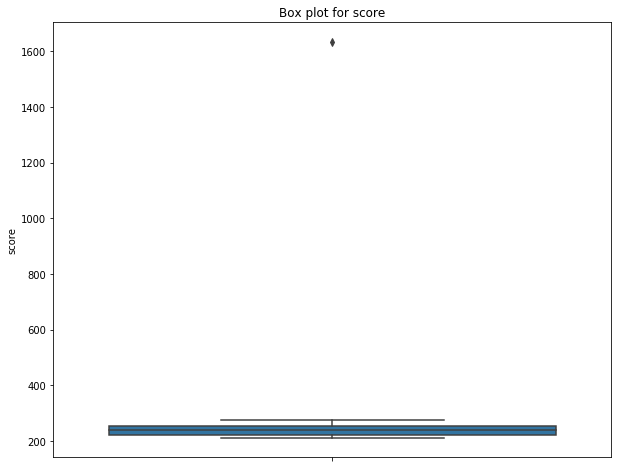

In [271]:
#  box plot
plt.figure(figsize=(10,8))
    
plt.title('Box plot for score')
sns.boxplot(y='score', data=scorecard)

In [272]:
#removing the outlier
scorecard=scorecard[scorecard['score']<450]
scorecard.head()

,p_good,Application ID,p_bad,odds,log_odds,score,performance tag
0,0.959244,32168,0.040756,23.536107,1.371735,242.425362,1
1,0.964055,42922,0.035945,26.820419,1.428466,238.656241,1
2,0.956370,53824,0.043630,21.919910,1.340839,244.478039,1
3,0.980740,19712,0.019260,50.920748,1.706895,220.157804,1
4,0.963541,50832,0.036459,26.427954,1.422064,239.081581,1


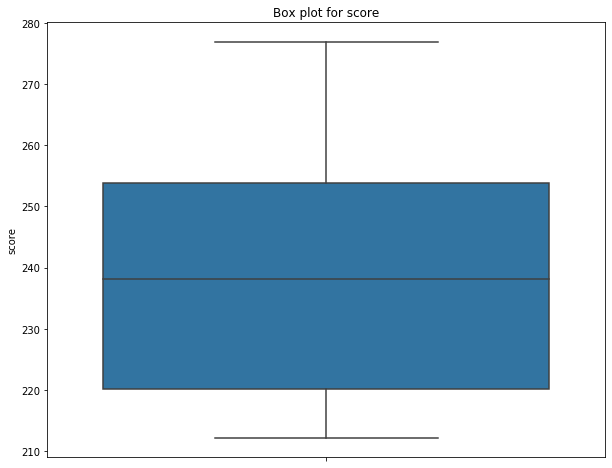

In [273]:
plt.figure(figsize=(10,8))
    
plt.title('Box plot for score')
sns.boxplot(y='score', data=scorecard)

In [274]:
#removing the outlier
scorecard=scorecard[scorecard['score']<258]
scorecard.head()

,p_good,Application ID,p_bad,odds,log_odds,score,performance tag
0,0.959244,32168,0.040756,23.536107,1.371735,242.425362,1
1,0.964055,42922,0.035945,26.820419,1.428466,238.656241,1
2,0.956370,53824,0.043630,21.919910,1.340839,244.478039,1
3,0.980740,19712,0.019260,50.920748,1.706895,220.157804,1
4,0.963541,50832,0.036459,26.427954,1.422064,239.081581,1


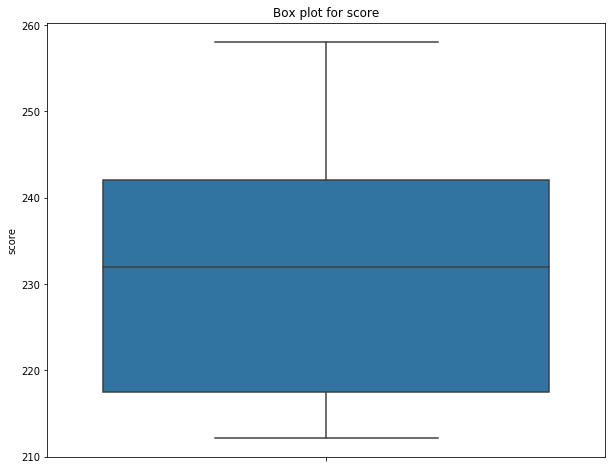

In [275]:
plt.figure(figsize=(10,8))
    
plt.title('Box plot for score')
sns.boxplot(y='score', data=scorecard)

In [276]:
# No outliers now
## checking data for the good cases
print(scorecard[scorecard["performance tag"] == 1].score.min())
print(scorecard[scorecard["performance tag"] == 1].score.max())
print(scorecard[scorecard["performance tag"] == 1].score.mean())
print(scorecard[scorecard["performance tag"] == 1].score.median())

212.21853068537692
257.9992978305767
231.34946932392927
231.95521514594327


In [277]:
## checking data for the bad cases
print(scorecard[scorecard["performance tag"] == 0].score.min())
print(scorecard[scorecard["performance tag"] == 0].score.max())
print(scorecard[scorecard["performance tag"] == 0].score.mean())
print(scorecard[scorecard["performance tag"] == 0].score.median())

212.21853068537692
257.9960089219707
230.77288427792686
231.19582245474777


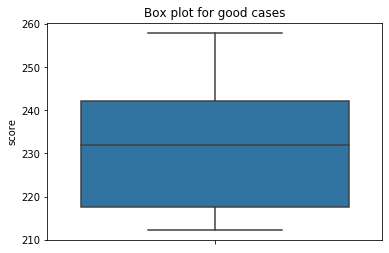

In [278]:
#BOX plot for good cases
plt.subplot(1, 1,1)
plt.title('Box plot for good cases')
sns.boxplot(y='score', data=scorecard[scorecard["performance tag"] == 1])

In [279]:
## good cases has value ranging from 240 t0 247
scorecard[scorecard["performance tag"]==1].score.describe()

count    16374.000000
mean       231.349469
std         13.263691
min        212.218531
25%        217.544044
50%        231.955215
75%        242.080901
max        257.999298
Name: score, dtype: float64

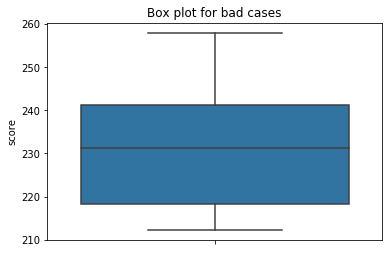

In [280]:
#BOX plot for bad cases
plt.subplot(1, 1,1)
plt.title('Box plot for bad cases')
sns.boxplot(y='score', data=scorecard[scorecard["performance tag"] == 0])

In [281]:
## bad cases has value ranging from 240 t0 249
scorecard[scorecard["performance tag"]==0].score.describe()

count    234.000000
mean     230.772884
std       13.113953
min      212.218531
25%      218.178940
50%      231.195822
75%      241.270001
max      257.996009
Name: score, dtype: float64

In [282]:
# cut_off choosen for logistic regression is 0.95
#score at cut of = 0.95 is
p_good=.95
p_bad=1-p_good
odds=p_good/p_bad
log_ods= np.log10(odds)
cut_off_score= offset - factor*log_ods

print(cut_off_score)

248.60288783338103


In [283]:
##### lets keep the cutoff as 248.6
(len(scorecard[scorecard['score'] < cut_off_score])/len(scorecard))*100

90.22157996146436

### Conclusion

1) Logistic regression model on the master dataset is preferable

2) cutoff score is 248.6

3) Logistic Regression on Master dataset
   - Accuracy:0.72
   - Recall/Sensitivity: 0.73
   - Precision: 0.97
   - Specificity:0.52
   
4) DT model on Master dataset
   - Accuracy:0.63
   - Recall/Sensitivity: 0.63
   - Precision: 0.98
   - Specificity:0.65
Since Logistical regression made a good output, we will proceeed with this model

5) Financial Benefits of the model
  - It saves overall cost of Acquisition the customer.(Example, If customer call is charging Re. 1 and if we are calling number of customers and acquire rate is less and we can call the customers likely to acquire and reduce the cost)
  - Help in acquiring the right customer, so the risk factor of being default customer is less. (Example, if the credit card limit is provided to the customer is Rs 50000 and if the customer got default then there is huge loss to the company and we can avoid or reduce this risk using model.)
  - Saves manual efforts of assessing each and every application as the model can process hundreds of applications automatically.